# EDA

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import datetime
import plotly.figure_factory as ff
from google.colab import files
from scipy.stats import norm
import plotly.express as px
from fbprophet import Prophet
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score


In [ ]:
#pip install pystan prophet

In [ ]:
#pip install pyod

# Loading the data from GDrive

In [ ]:
pwd

'/content'

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/Colab Notebooks/Walmart

/content/gdrive/MyDrive/Colab Notebooks/Walmart


In [ ]:
pwd

'/content/gdrive/MyDrive/Colab Notebooks/Walmart'

In [ ]:
!ls

avgsalesperdept.png    negative_weekly_sales.png  train.csv
avgsalesperstore.png   network.gv		  week.csv
avg_sales_store.png    network.gv.pdf		  weekly1.csv
effect_of_temp.png     sampleSubmission.csv	  weekly2.csv
features.csv	       Scenario1.csv		  weekly.csv
fetureImpLightGBM.pdf  stores.csv		  weekly_merge.csv
holidayDist.png        test.csv			  weekly_merge.xlsx
myImagePDF.pdf	       times.csv


In [ ]:
raw_features=pd.read_csv("features.csv")
raw_stores=pd.read_csv("stores.csv")
raw_data=pd.read_csv("train.csv")

# Understanding the Data and getting an impression on what we are actually working with

In [ ]:
print(raw_features.shape)
print(raw_stores.shape)
print(raw_data.shape)

(8190, 12)
(45, 3)
(421570, 5)


In [ ]:
raw_stores.isna().sum()

Store    0
Type     0
Size     0
dtype: int64

In [ ]:
raw_data.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [ ]:
raw_features.isna().sum().sort_values(ascending=True)

Store              0
Date               0
Temperature        0
Fuel_Price         0
IsHoliday          0
CPI              585
Unemployment     585
MarkDown5       4140
MarkDown1       4158
MarkDown3       4577
MarkDown4       4726
MarkDown2       5269
dtype: int64

In [ ]:
#so as we can see that the dataset containg stores data and training dataset are clean without NA.. 
#So lets proceed with the features dataset 
# Things that we know from the dataset provider about the features dataset and Initial Impressions
# 1) Duration of the dataset is from 2010-02-05 to 2012-11-01 (5th Feb 2010 - 1st November 2012 )
# 2) We have also been told by walmart that the markdown values have been only recorded after November 2011
# 3) Also have been informed that not all stores have markdowns at the same time 
# 4) The above two point explains the huge number of Null Values for Markdowns as 
#    the timeframe for which markdowns have not been recorded at all is almost half the duration of the dataset given to us.. on top of those we have 3rd point
# Lets come to markdown after dealing with other NA's
# 5) So essesntialy the missing data is from CPI and Unemployment
#
#

In [ ]:
raw_features.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,8190.0,23.000000,12.987966,1.000,12.000000,23.000000,34.000000,45.000000
Temperature,8190.0,59.356198,18.678607,-7.290,45.902500,60.710000,73.880000,101.950000
Fuel_Price,8190.0,3.405992,0.431337,2.472,3.041000,3.513000,3.743000,4.468000
MarkDown1,4032.0,7032.371786,9262.747448,-2781.450,1577.532500,4743.580000,8923.310000,103184.980000
MarkDown2,2921.0,3384.176594,8793.583016,-265.760,68.880000,364.570000,2153.350000,104519.540000
MarkDown3,3613.0,1760.100180,11276.462208,-179.260,6.600000,36.260000,163.150000,149483.310000
MarkDown4,3464.0,3292.935886,6792.329861,0.220,304.687500,1176.425000,3310.007500,67474.850000
MarkDown5,4050.0,4132.216422,13086.690278,-185.170,1440.827500,2727.135000,4832.555000,771448.100000
CPI,7605.0,172.460809,39.738346,126.064,132.364839,182.764003,213.932412,228.976456
Unemployment,7605.0,7.826821,1.877259,3.684,6.634000,7.806000,8.567000,14.313000


In [ ]:
#Immediately the things that can be observed from the above describe function are : 
# There are negative values for markdowns M1,M2,M3,M5 which usually should be positive and thus have to be tweaked and has to be check 
#  lets try to visualize the cpi distribution and Unemployment distribution

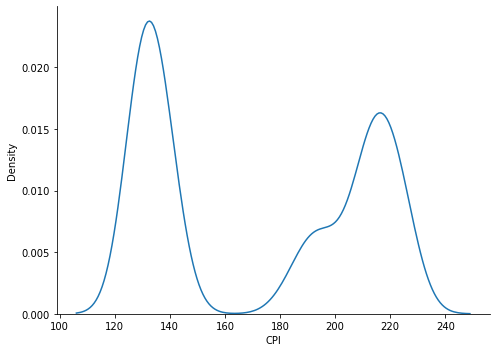

In [ ]:
sns.displot(
    data=raw_features,
    x="CPI", 
    kind="kde",
    aspect=1.4,
   
    
)

In [ ]:
# Imputing mean values for cpi can change the distribution of the dataset as CPI is not distributed normally 

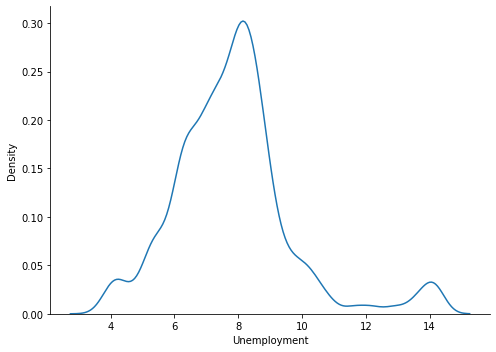

In [ ]:
sns.displot(
    data=raw_features,
    x="Unemployment", 
    kind="kde",
    aspect=1.4,
    
)

In [ ]:
print("Mean :",raw_features["CPI"].mean())
print("Median :",raw_features["CPI"].median())
print("Mode :",raw_features["CPI"].mode())

Mean : 172.46080918276078
Median : 182.7640032
Mode : 0    132.716097
dtype: float64


In [ ]:
print("Mean :",raw_features["Unemployment"].mean())
print("Median :",raw_features["Unemployment"].median())
print("Mode :",raw_features["Unemployment"].mode())

Mean : 7.826821038790305
Median : 7.806
Mode : 0    8.099
dtype: float64


In [ ]:
"""sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=raw_features["Unemployment"])"""

'sns.set_theme(style="whitegrid")\nax = sns.boxplot(x=raw_features["Unemployment"])'

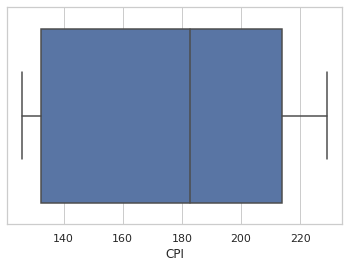

In [ ]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=raw_features["CPI"])

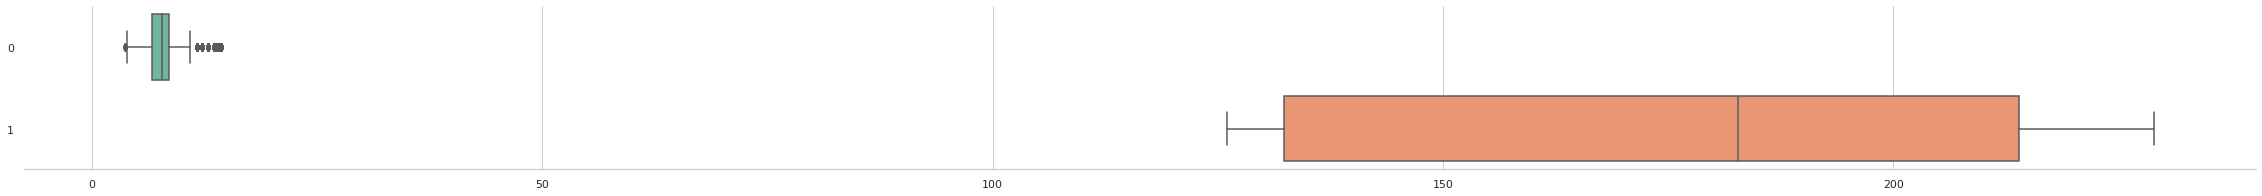

In [ ]:
fig, ax = plt.subplots(figsize=(40, 3))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)
ax = sns.boxplot(data=[raw_features["Unemployment"],raw_features["CPI"]], orient="h", palette="Set2")
plt.show()

In [ ]:
raw_features[(raw_features['CPI'].isnull())&(raw_features['Unemployment'].isnull())]

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
169,1,2013-05-03,66.66,3.386,2298.63,2.00,129.90,55.46,1301.04,NaN,NaN,False
170,1,2013-05-10,63.90,3.392,4624.61,83.88,42.38,1618.31,8144.90,NaN,NaN,False
171,1,2013-05-17,69.53,3.454,16170.50,92.00,8.32,4127.24,6206.97,NaN,NaN,False
172,1,2013-05-24,77.19,3.494,7959.89,178.00,1621.47,3152.57,2938.70,NaN,NaN,False
173,1,2013-05-31,78.02,3.466,2369.77,142.45,475.35,45.55,2056.84,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [ ]:
#from the above we can see that all the missing values of CPI and Unemployment are from the same rows 
# where there is NA data when compared between CPI and Unemployment = 585 rows which is the same as the amount of missing values of CPI and Unemployment
# So What we will be doing for now is having two different approach and those would be :
# First one would be removing the NA values as the number of rows we would be losing would be a pretty acceptable loss of data (7.14 % of the data would be removed) without skewing the data 
# Second one would be imputing the values , Unemployment would take a median , CPI since it being bimodal distribution have to be imputed 

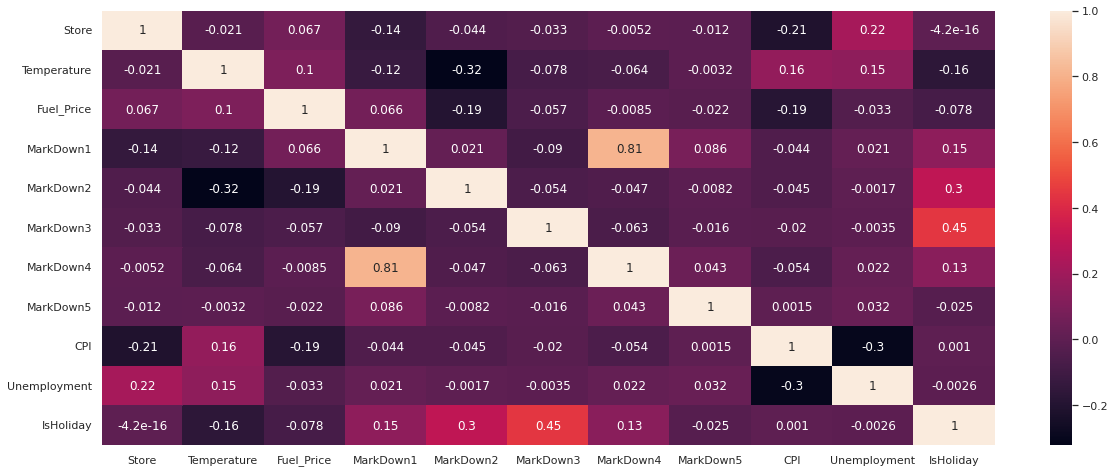

In [ ]:
fig, xl = plt.subplots(figsize=(20, 8))
xl=sns.heatmap(raw_features.corr(),annot=True)
plt.show()

In [ ]:
"""fig, ax = plt.subplots(figsize=(20, 8))
ax=sns.heatmap(features_scenario1.corr(),annot=True)
plt.show()"""

'fig, ax = plt.subplots(figsize=(20, 8))\nax=sns.heatmap(features_scenario1.corr(),annot=True)\nplt.show()'

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

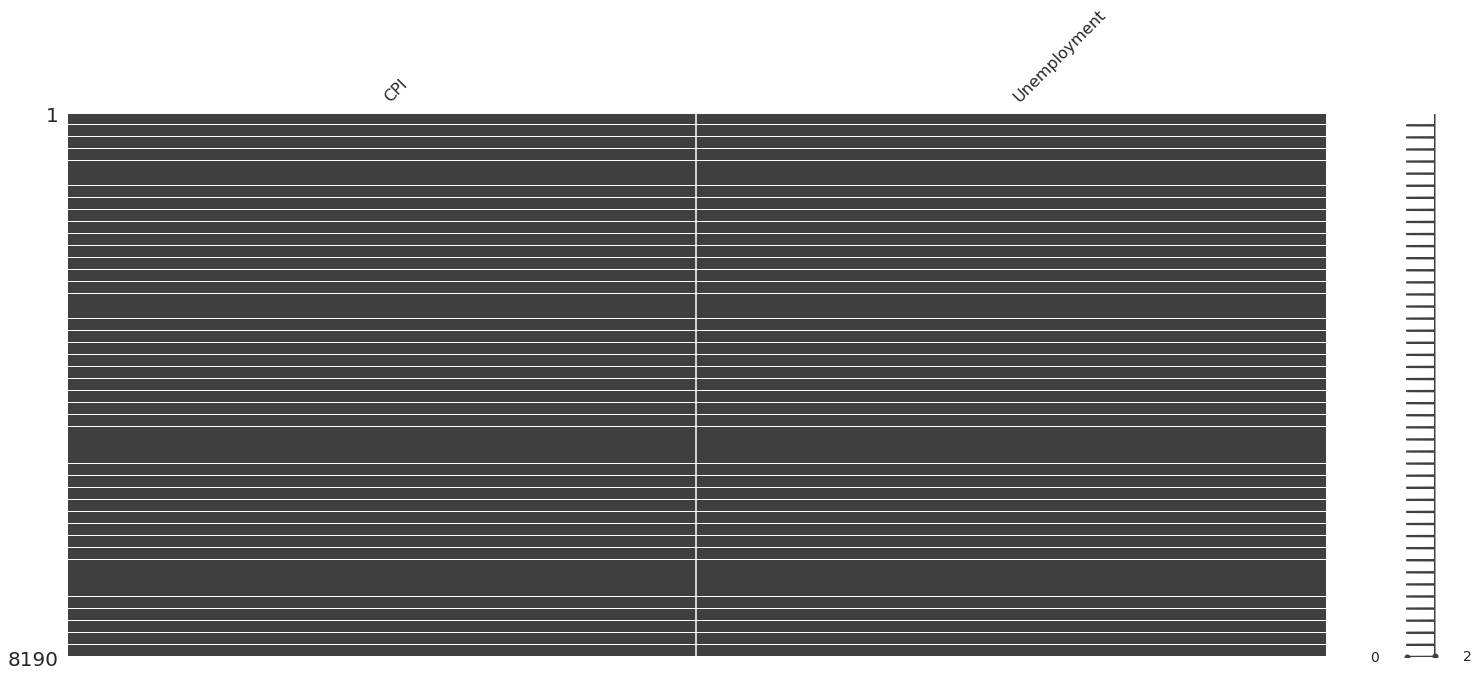

In [ ]:
from google.colab import files
fig=msno.matrix(raw_features[['CPI','Unemployment']])
figs=fig.get_figure()
figs.savefig("myImagePDF.pdf", format="pdf", bbox_inches="tight")
files.download("myImagePDF.pdf")

In [ ]:
# from the above visualization we can actually see that CPI and Unemployment have been missing at the same exact rows thus leading us to remove them, due to a very minor loss of data
features_drop=raw_features.dropna(subset=["CPI"])

In [ ]:
features_drop.shape

(7605, 12)

In [ ]:
features_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7605 entries, 0 to 8176
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         7605 non-null   int64  
 1   Date          7605 non-null   object 
 2   Temperature   7605 non-null   float64
 3   Fuel_Price    7605 non-null   float64
 4   MarkDown1     3449 non-null   float64
 5   MarkDown2     2441 non-null   float64
 6   MarkDown3     3084 non-null   float64
 7   MarkDown4     2974 non-null   float64
 8   MarkDown5     3465 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     7605 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 720.4+ KB


In [ ]:
features_drop["Date"]=pd.to_datetime(features_drop["Date"])

In [ ]:
features_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7605 entries, 0 to 8176
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         7605 non-null   int64         
 1   Date          7605 non-null   datetime64[ns]
 2   Temperature   7605 non-null   float64       
 3   Fuel_Price    7605 non-null   float64       
 4   MarkDown1     3449 non-null   float64       
 5   MarkDown2     2441 non-null   float64       
 6   MarkDown3     3084 non-null   float64       
 7   MarkDown4     2974 non-null   float64       
 8   MarkDown5     3465 non-null   float64       
 9   CPI           7605 non-null   float64       
 10  Unemployment  7605 non-null   float64       
 11  IsHoliday     7605 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(9), int64(1)
memory usage: 720.4 KB


In [ ]:
split_date = '2011-11-25 23:00:00'


In [ ]:
type(split_date)

str

In [ ]:
df_training = features_drop.loc[features_drop['Date'] <= split_date]
df_test = features_drop.loc[features_drop['Date'] > split_date]

In [ ]:
df_test.shape

(3330, 12)

In [ ]:
df_test.head(100)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
95,1,2011-12-02,48.91,3.172,5629.51,68.00,1398.11,2084.64,20475.32,218.714733,7.866,False
96,1,2011-12-09,43.93,3.158,4640.65,19.00,105.02,3639.42,14461.82,218.961846,7.866,False
97,1,2011-12-16,51.63,3.159,5011.32,67.00,347.37,225.79,4011.37,219.179453,7.866,False
98,1,2011-12-23,47.96,3.112,2725.36,40.48,634.70,24.90,2739.43,219.357722,7.866,False
99,1,2011-12-30,44.55,3.129,5762.10,46011.38,260.36,983.65,4735.78,219.535990,7.866,True
...,...,...,...,...,...,...,...,...,...,...,...,...
298,2,2012-04-27,67.20,3.814,3076.68,NaN,38.32,108.71,2708.90,221.255812,6.891,False
299,2,2012-05-04,76.73,3.749,23731.47,NaN,78.09,7931.42,4443.52,221.309517,6.891,False
300,2,2012-05-11,73.87,3.688,16519.50,NaN,117.38,5131.02,3634.25,221.363221,6.891,False
301,2,2012-05-18,71.27,3.630,9262.12,NaN,42.67,3694.80,4612.01,221.380331,6.891,False


In [ ]:
features_scenario1=df_test

In [ ]:
4275+3330

7605

In [ ]:
features_drop.shape

(7605, 12)

In [ ]:
features_scenario1.isna().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1         15
MarkDown2       1013
MarkDown3        370
MarkDown4        466
MarkDown5          0
CPI                0
Unemployment       0
IsHoliday          0
dtype: int64

In [ ]:
raw_features_merge_with_store=raw_features.merge(raw_stores,how="inner",on="Store")

In [ ]:
raw_features_merge_with_store.head(10)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315
5,1,2010-03-12,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,False,A,151315
6,1,2010-03-19,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,False,A,151315
7,1,2010-03-26,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,False,A,151315
8,1,2010-04-02,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,False,A,151315
9,1,2010-04-09,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808,False,A,151315


In [ ]:
featuresdrop_merge_with_store=features_drop.merge(raw_stores,how="inner",on="Store")

In [ ]:
featuresdrop_merge_with_store.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,7605.000000,7605.000000,7605.000000,3449.000000,2441.000000,3084.000000,2974.000000,3465.000000,7605.000000,7605.000000,7605.00000
mean,23.000000,58.297325,3.389624,7346.686886,3918.187853,2026.774066,3349.993410,4257.267299,172.460809,7.826821,130287.60000
std,12.988027,18.709862,0.441461,9724.747757,9522.212782,12185.103596,7180.599985,14050.353680,39.738346,1.877259,63116.26787
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000,34875.00000
25%,12.000000,44.720000,3.001000,1673.310000,57.960000,5.735000,282.730000,1472.860000,132.364839,6.634000,70713.00000
50%,23.000000,59.250000,3.494000,4879.580000,345.500000,30.370000,1108.435000,2772.050000,182.764003,7.806000,126512.00000
75%,34.000000,72.620000,3.742000,9264.480000,3128.740000,137.517500,3162.400000,4893.310000,213.932412,8.567000,202307.00000
max,45.000000,100.140000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000,219622.00000


In [ ]:
featuresdrop_merge_with_store.info(
    
)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7605 entries, 0 to 7604
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         7605 non-null   int64         
 1   Date          7605 non-null   datetime64[ns]
 2   Temperature   7605 non-null   float64       
 3   Fuel_Price    7605 non-null   float64       
 4   MarkDown1     3449 non-null   float64       
 5   MarkDown2     2441 non-null   float64       
 6   MarkDown3     3084 non-null   float64       
 7   MarkDown4     2974 non-null   float64       
 8   MarkDown5     3465 non-null   float64       
 9   CPI           7605 non-null   float64       
 10  Unemployment  7605 non-null   float64       
 11  IsHoliday     7605 non-null   bool          
 12  Type          7605 non-null   object        
 13  Size          7605 non-null   int64         
dtypes: bool(1), datetime64[ns](1), float64(9), int64(2), object(1)
memory usage: 839.2+ KB


In [ ]:
featuresdrop_merge_with_store['MarkDown1'] = featuresdrop_merge_with_store['MarkDown1'].replace(np.nan, 0)
featuresdrop_merge_with_store['MarkDown2'] = featuresdrop_merge_with_store['MarkDown2'].replace(np.nan, 0)
featuresdrop_merge_with_store['MarkDown3'] = featuresdrop_merge_with_store['MarkDown3'].replace(np.nan, 0)
featuresdrop_merge_with_store['MarkDown4'] = featuresdrop_merge_with_store['MarkDown4'].replace(np.nan, 0)
featuresdrop_merge_with_store['MarkDown5'] = featuresdrop_merge_with_store['MarkDown5'].replace(np.nan, 0)

In [ ]:
features_scenario_dropand0=featuresdrop_merge_with_store

In [ ]:
featuresdrop_merge_with_store.shape


(7605, 14)

In [ ]:
print("Shape of stores data Set: ",raw_stores.shape)
print("Shape of features data Set: ",features_drop.shape)
print("Shape of data data Set: ",raw_data.shape)

Shape of stores data Set:  (45, 3)
Shape of features data Set:  (7605, 12)
Shape of data data Set:  (421570, 5)


In [ ]:
print("Shape of merged data",featuresdrop_merge_with_store.shape)

Shape of merged data (7605, 14)


In [ ]:
#This is the scenario where CPI and Unemployment Null values have been dropped and nas have been converted to 0 for markdown
features_scenario_dropand0.shape 

(7605, 14)

In [ ]:
#lets check how the train dataset is like 

In [ ]:
raw_data.head(10)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
5,1,1,2010-03-12,21043.39,False
6,1,1,2010-03-19,22136.64,False
7,1,1,2010-03-26,26229.21,False
8,1,1,2010-04-02,57258.43,False
9,1,1,2010-04-09,42960.91,False


In [ ]:
raw_data.shape

(421570, 5)

In [ ]:
# by above description  we can see that the data we have in the training file is for weekly sales 
# lets merge the data set with the processesd features dataset  

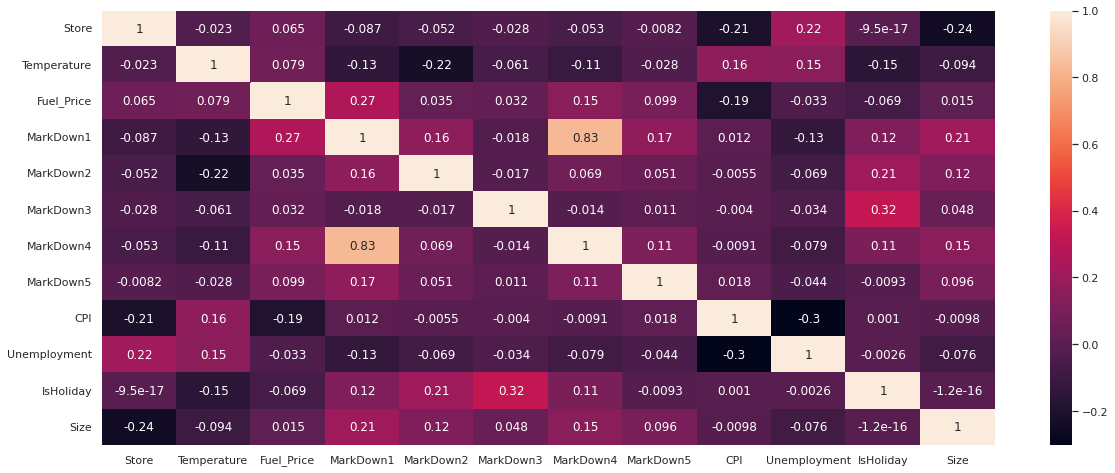

In [ ]:
fig, xl = plt.subplots(figsize=(20, 8))
sns.heatmap(features_scenario_dropand0.corr(),annot=True)
plt.show()

In [ ]:
#As we have already have one dataset in a datetime format for "date" feature we are converting the other one to datetime format too !!

raw_data["Date"]=pd.to_datetime(raw_data["Date"])

In [ ]:
df1=raw_data.merge(features_scenario_dropand0,on=['Store','IsHoliday','Date'],how='inner')

In [ ]:
print("Shape of Merged data Set: Inner",df1.shape)

Shape of Merged data Set: Inner (421570, 16)


In [ ]:
df1.to_csv("Scenario1.csv")
files.download('Scenario1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df1.shape

(421570, 16)

In [ ]:
df1.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64

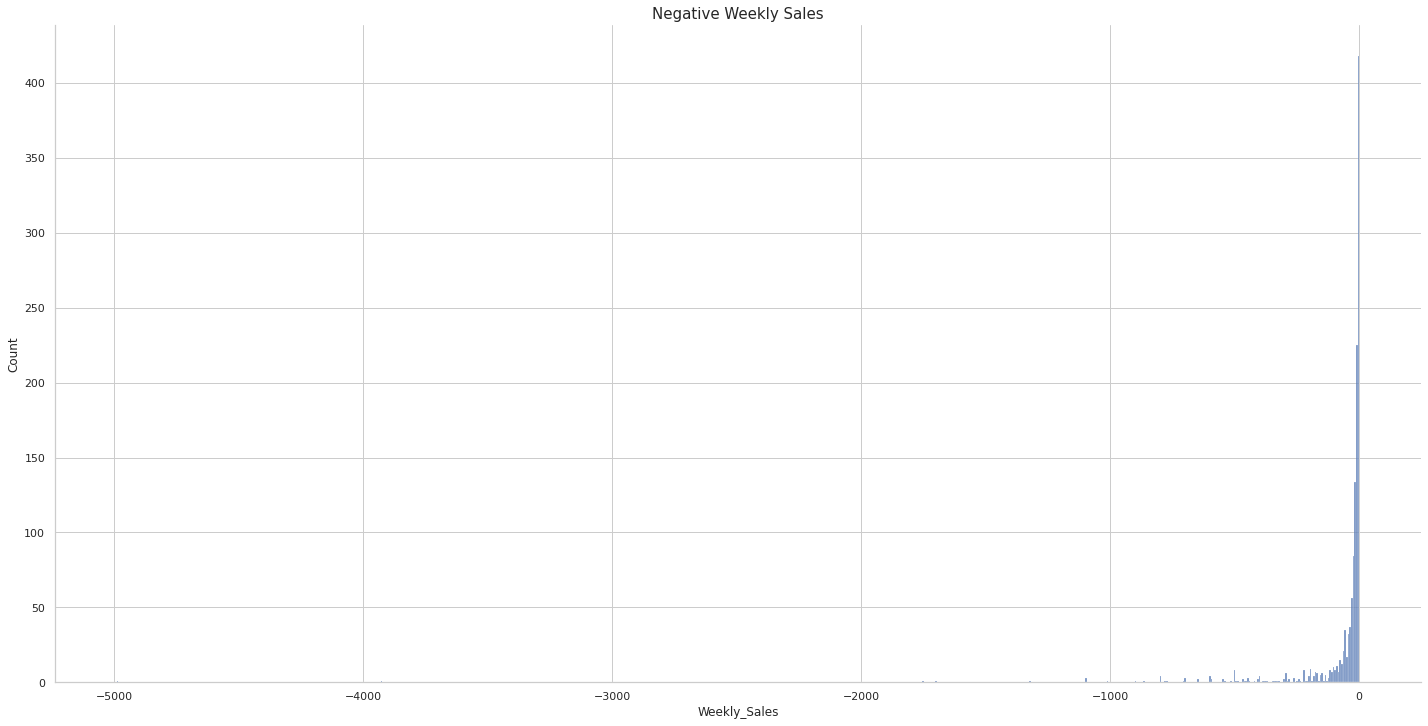

In [ ]:
vis = df1["Weekly_Sales"][df1.Weekly_Sales < 0]
sns.displot(vis,height=10,aspect=2)
plt.title("Negative Weekly Sales", fontsize=15)
plt.savefig('negative_weekly_sales.png',bbox_inches="tight",dpi=1500)
plt.show()

In [ ]:
df1.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289,136727.915739
std,12.785297,30.492054,22711.183519,18.447931,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296,60980.583328
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


In [ ]:
files.download('negative_weekly_sales.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
hellss=df1.copy()

In [ ]:
hells=df1[['Weekly_Sales','MarkDown2','MarkDown3']]

In [ ]:
hells.describe().loc[['min']].T

,min
Weekly_Sales,-4988.94
MarkDown2,-265.76
MarkDown3,-29.10


In [ ]:
#from the above we can find two anamolies that there are min values with -ve values for the features named "Weekly Sales","MarkDown2", "MarkDown3"

In [ ]:
df1[(df1['Weekly_Sales'] <= 0)]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
188,1,47,2010-02-19,-863.00,False,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,A,151315
406,1,47,2010-03-12,-698.00,False,57.79,2.667,0.00,0.00,0.00,0.00,0.00,211.380643,8.106,A,151315
2549,1,47,2010-10-08,-58.00,False,63.93,2.633,0.00,0.00,0.00,0.00,0.00,211.746754,7.838,A,151315
3632,1,54,2011-01-21,-50.00,False,44.04,3.016,0.00,0.00,0.00,0.00,0.00,211.827234,7.742,A,151315
4132,1,47,2011-03-11,0.00,False,53.56,3.459,0.00,0.00,0.00,0.00,0.00,214.111056,7.742,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420066,45,49,2012-05-25,-4.97,False,67.21,3.798,5370.39,0.00,361.22,1287.62,2461.81,191.002810,8.567,B,118221
420403,45,49,2012-06-29,-34.00,False,75.22,3.506,3291.36,425.60,0.00,314.88,2255.34,191.099246,8.567,B,118221
420736,45,49,2012-08-03,-1.91,False,76.58,3.654,24853.05,39.56,17.96,11142.69,2768.32,191.164090,8.684,B,118221
421007,45,54,2012-08-31,0.00,False,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,191.461281,8.684,B,118221


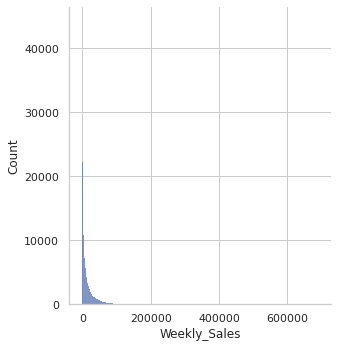

In [ ]:
#So to correct this lets check the distribution of weekly sales to get an understanding of how to impute the -ve values
sns.displot(df1['Weekly_Sales'])

In [ ]:
outlier_max=df1["Weekly_Sales"].quantile(0.95)

In [ ]:
outlier_min=df1["Weekly_Sales"].quantile(0.05)


In [ ]:
outlier_min

59.974500000000006

In [ ]:
df1.shape

(421570, 16)

In [ ]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,421570.0,22.200546,12.785297,1.000,11.000000,22.00000,33.000000,45.000000
Dept,421570.0,44.260317,30.492054,1.000,18.000000,37.00000,74.000000,99.000000
Weekly_Sales,421570.0,15981.258123,22711.183519,-4988.940,2079.650000,7612.03000,20205.852500,693099.360000
Temperature,421570.0,60.090059,18.447931,-2.060,46.680000,62.09000,74.280000,100.140000
Fuel_Price,421570.0,3.361027,0.458515,2.472,2.933000,3.45200,3.738000,4.468000
MarkDown1,421570.0,2590.074819,6052.385934,0.000,0.000000,0.00000,2809.050000,88646.760000
MarkDown2,421570.0,879.974298,5084.538801,-265.760,0.000000,0.00000,2.200000,104519.540000
MarkDown3,421570.0,468.087665,5528.873453,-29.100,0.000000,0.00000,4.540000,141630.610000
MarkDown4,421570.0,1083.132268,3894.529945,0.000,0.000000,0.00000,425.290000,67474.850000
MarkDown5,421570.0,1662.772385,4207.629321,0.000,0.000000,0.00000,2168.040000,108519.280000


In [ ]:
#RemoveAnomalies
df111=df1[(df1["Weekly_Sales"]>0)]         
df111.shape

(420212, 16)

In [ ]:
df111=df111[(df111["MarkDown2"]>=0)]  
df111.shape 

(418910, 16)

In [ ]:
df111=df111[(df111["MarkDown3"]>=0)]  
df111.shape 

(418654, 16)

In [ ]:
df111.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315


In [ ]:
#After Removing the anamolies
df111.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,418654.000000,418654.000000,418654.000000,418654.000000,418654.000000,418654.000000,418654.000000,418654.000000,418654.000000,418654.000000,418654.000000,418654.000000,418654.000000
mean,22.197354,44.242241,16028.664965,60.052348,3.359308,2575.945153,882.156489,470.476283,1080.156246,1654.468456,171.202468,7.961483,136684.968430
std,12.790526,30.510172,22726.308043,18.454874,0.458387,6056.919377,5086.078731,5544.292474,3901.826427,4207.467593,39.158998,1.864320,61010.768249
min,1.000000,1.000000,0.010000,-2.060000,2.472000,0.000000,0.000000,0.000000,0.000000,0.000000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2118.287500,46.660000,2.931000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7659.405000,62.060000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.350989,7.866000,140167.000000
75%,33.000000,74.000000,20267.445000,74.250000,3.735000,2753.900000,2.630000,4.360000,415.360000,2146.940000,212.412888,8.567000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


In [ ]:
df1

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421566,45,94,2012-10-26,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421567,45,95,2012-10-26,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421568,45,97,2012-10-26,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221


In [ ]:
df11=df1[(df1["Weekly_Sales"]<outlier_max) & (df1["Weekly_Sales"]>outlier_min)]

In [ ]:
df11.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,379412.000000,379412.000000,379412.000000,379412.000000,379412.000000,379412.000000,379412.000000,379412.000000,379412.000000,379412.000000,379412.000000,379412.000000,379412.000000
mean,22.099649,43.008221,12772.788110,59.907980,3.359936,2597.876727,884.764318,457.445892,1082.140291,1651.734646,171.384283,7.955339,136806.898203
std,12.714089,30.180710,13820.034321,18.457643,0.458989,6041.121725,5073.617672,5422.571084,3881.167694,4157.208046,39.097377,1.864337,60120.237747
min,1.000000,1.000000,59.980000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,34875.000000
25%,11.000000,17.000000,2488.280000,46.540000,2.931000,0.000000,0.000000,0.000000,0.000000,0.000000,132.364839,6.885000,93638.000000
50%,22.000000,35.000000,7612.030000,61.900000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.544590,7.866000,140167.000000
75%,32.000000,72.000000,18295.685000,74.150000,3.738000,2920.430000,2.650000,4.460000,445.470000,2169.340000,212.571112,8.567000,202505.000000
max,45.000000,99.000000,61201.830000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


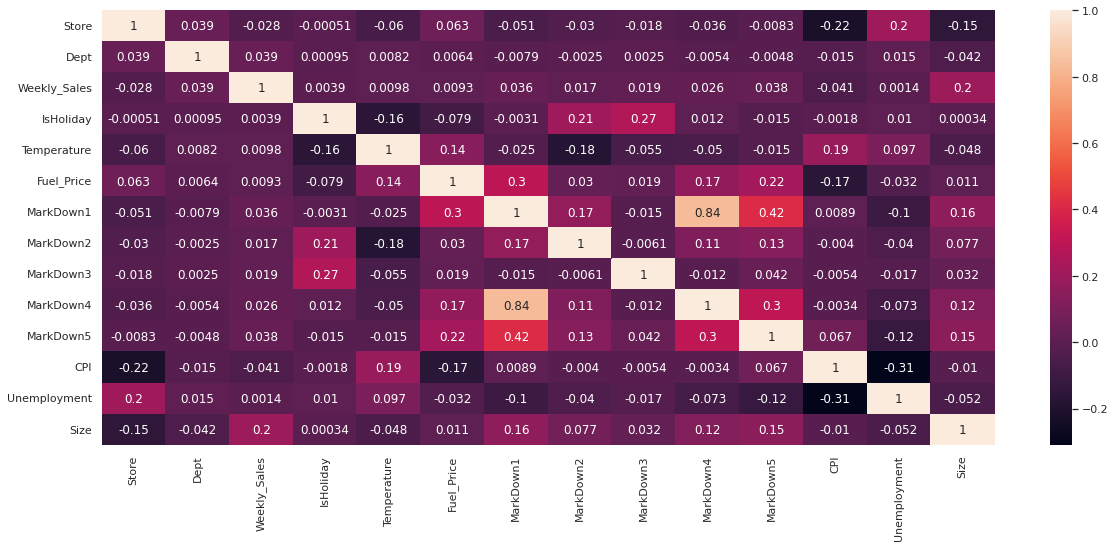

In [ ]:
fig, xl = plt.subplots(figsize=(20, 8))
sns.heatmap(df11.corr(),annot=True)
plt.show()

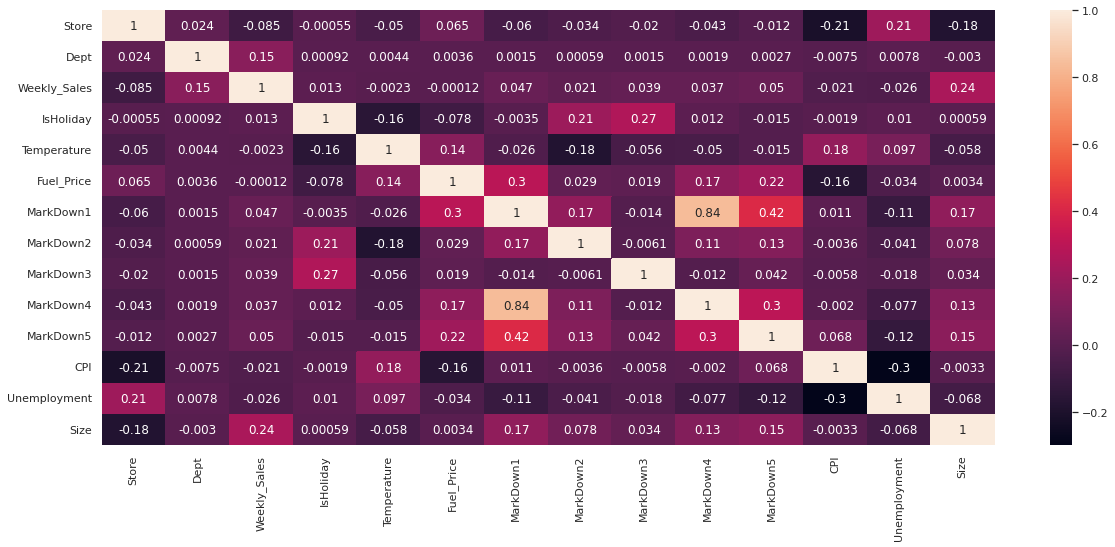

In [ ]:
fig, xl = plt.subplots(figsize=(20, 8))
sns.heatmap(df1.corr(),annot=True)
plt.show()

In [ ]:
df111.to_csv("times.csv")

In [ ]:
testing_df=pd.read_csv("times.csv",parse_dates=["Date"])

In [ ]:
del testing_df[testing_df.columns[0]]

In [ ]:
testing_df.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315


In [ ]:
#testing_df['Dates'] = testing_df['Date']


In [ ]:
"""fig, xl = plt.subplots(figsize=(20, 20))
testing_df.Weekly_Sales.plot()
plt.show()"""

'fig, xl = plt.subplots(figsize=(20, 20))\ntesting_df.Weekly_Sales.plot()\nplt.show()'

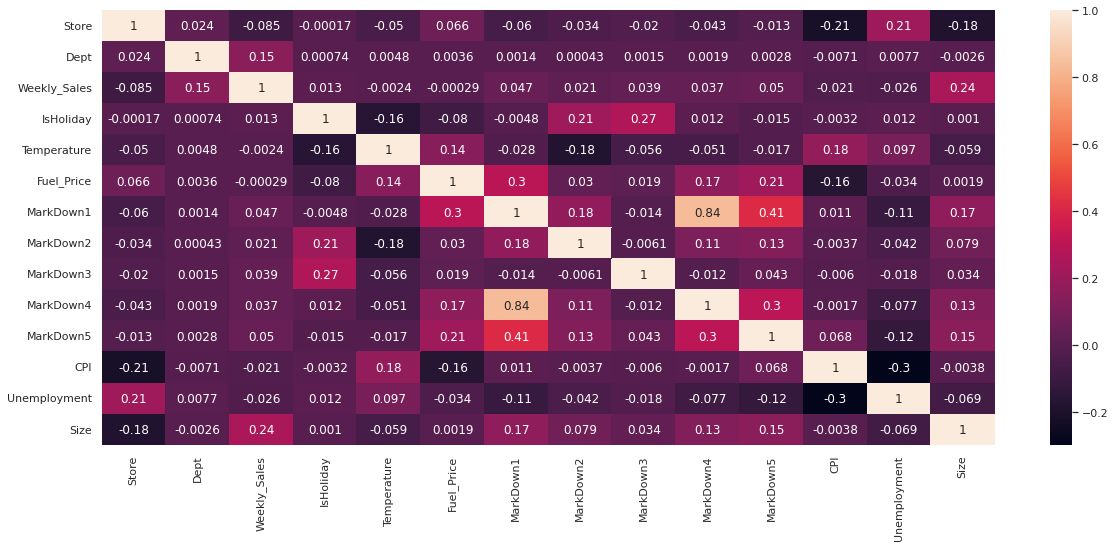

In [ ]:
fig, xl = plt.subplots(figsize=(20, 8))
sns.heatmap(testing_df.corr(),annot=True)
plt.show()

In [ ]:
testing_df.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315


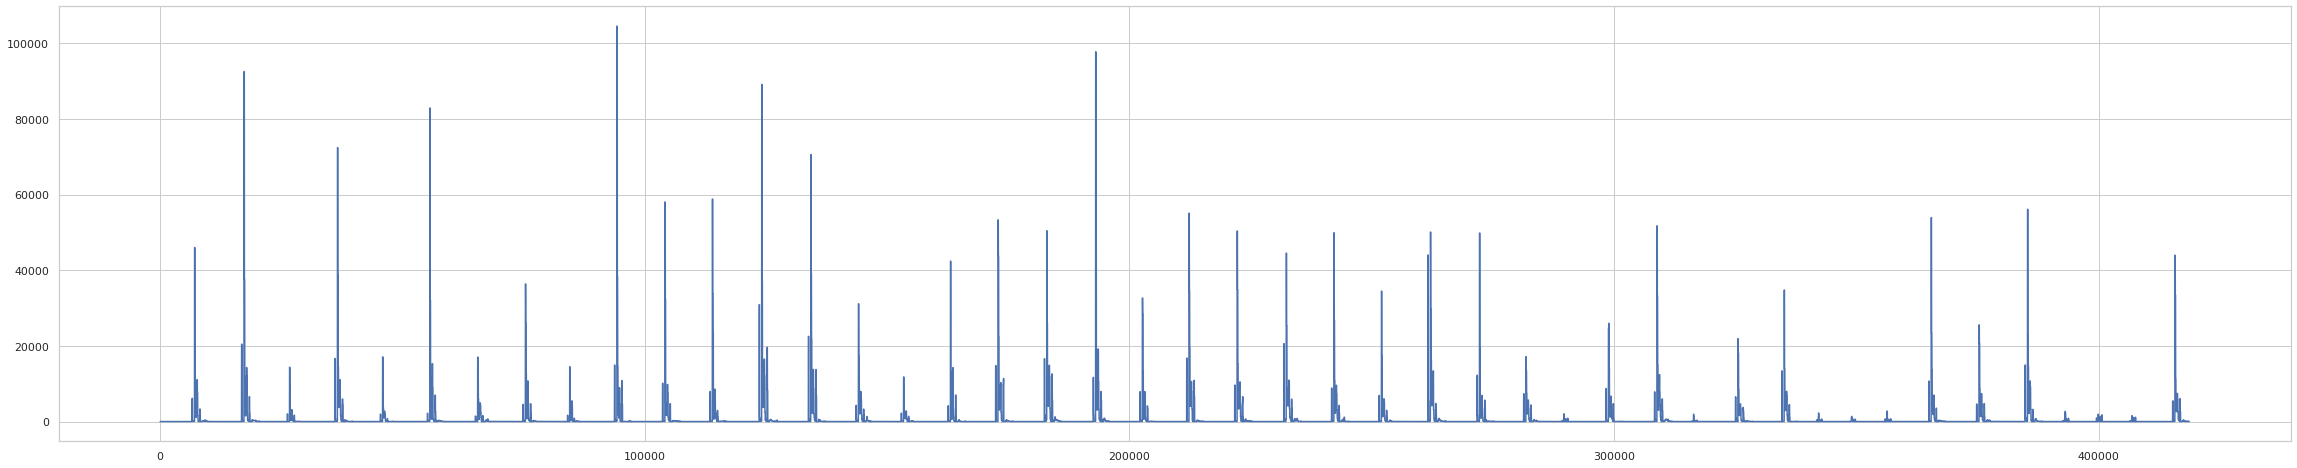

In [ ]:
fig, xl = plt.subplots(figsize=(40, 8))
testing_df.MarkDown2.plot()
plt.show()

In [ ]:
#Feature Engineering
#Creating two columns to extract the week and year from the data
testing_df['Week'] = pd.to_datetime(testing_df['Date']).dt.week
testing_df['Year'] = pd.to_datetime(testing_df['Date']).dt.year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
testing_df['Month']=testing_df["Date"].dt.month

In [ ]:
testing_df.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Week,Year,Month
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,5,2010,2
1,1,2,2010-02-05,50605.27,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,5,2010,2
2,1,3,2010-02-05,13740.12,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,5,2010,2
3,1,4,2010-02-05,39954.04,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,5,2010,2
4,1,5,2010-02-05,32229.38,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,5,2010,2


In [ ]:
#Creating a new dataset just for the weekly sales mean
weekly_sales = testing_df.groupby(['Year','Week']).agg({'Weekly_Sales': ['mean', 'median']})
weekly_sales2010 = testing_df.loc[testing_df['Year']==2010].groupby(['Week']).agg({'Weekly_Sales': ['mean', 'median']})
weekly_sales2011 = testing_df.loc[testing_df['Year']==2011].groupby(['Week']).agg({'Weekly_Sales': ['mean', 'median']})
weekly_sales2012 = testing_df.loc[testing_df['Year']==2012].groupby(['Week']).agg({'Weekly_Sales': ['mean', 'median']})


In [ ]:
print('total week',weekly_sales.shape)
print('total week 2010',weekly_sales2010.shape)
print('total week 2011',weekly_sales2011.shape)
print('total week 2012',weekly_sales2012.shape)

total week (143, 2)
total week 2010 (48, 2)
total week 2011 (52, 2)
total week 2012 (43, 2)


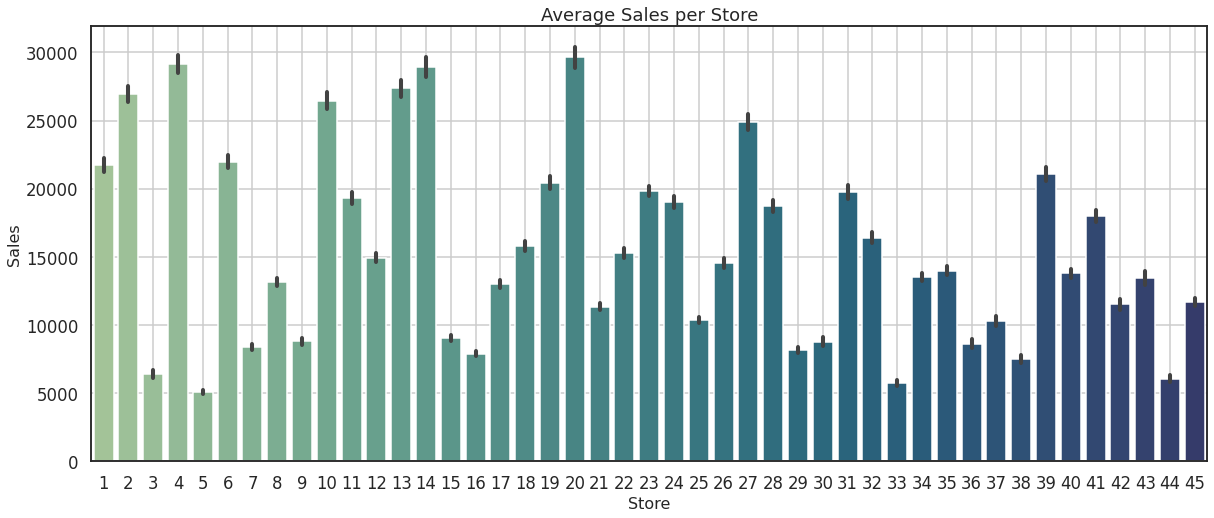

In [ ]:
plt.figure(figsize=(20,8))
sns.set(style="white", context="talk")
sns.barplot(x='Store',y='Weekly_Sales',palette= "crest", data=testing_df)
plt.grid()
plt.title('Average Sales per Store', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Store', fontsize=16)
plt.savefig('avgsalesperstore.png',bbox_inches="tight",dpi=1500)
plt.show()

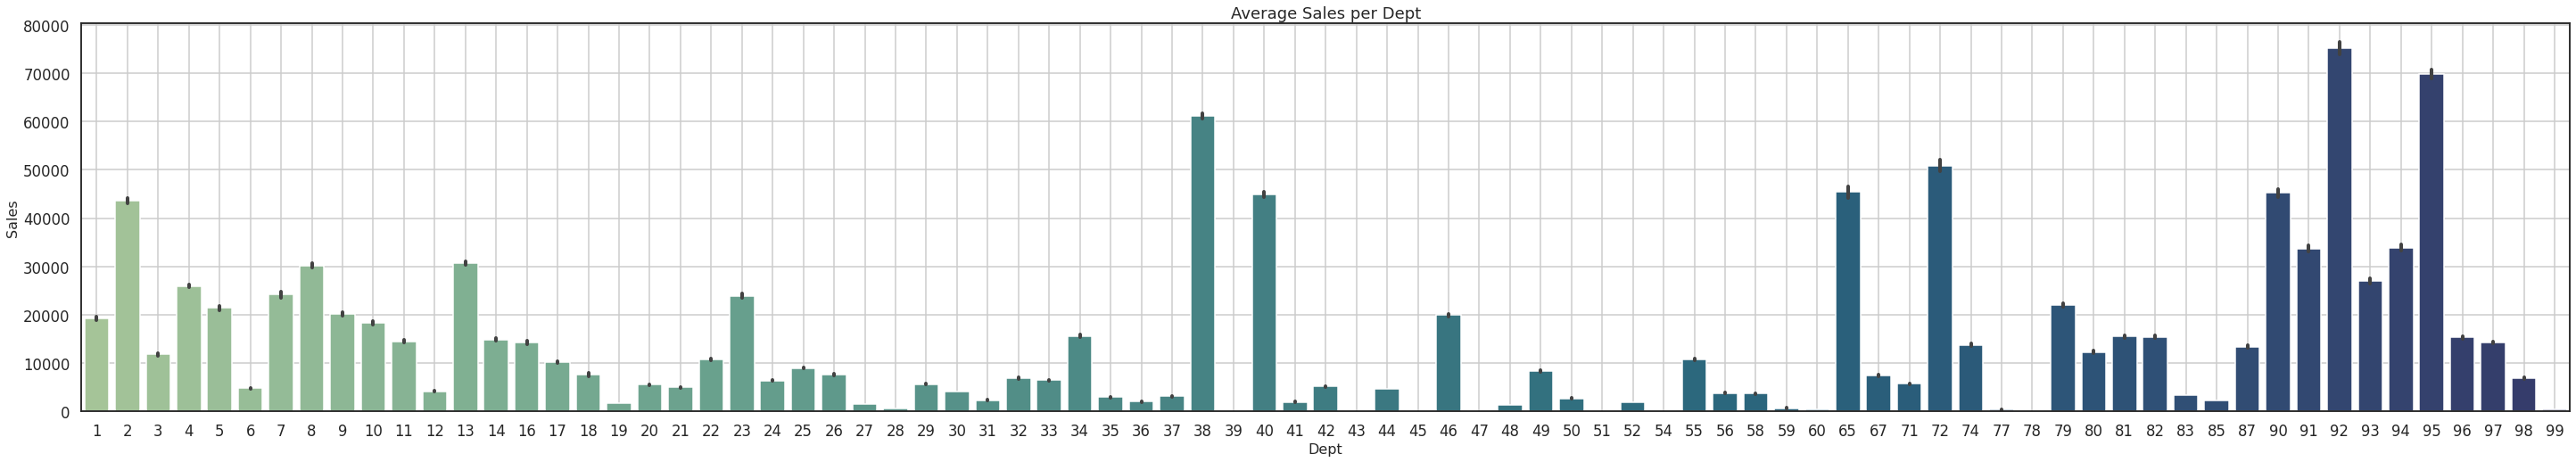

In [ ]:
plt.figure(figsize=(50,8))
sns.set(style="white", context="talk")
sns.barplot(x='Dept',y='Weekly_Sales',palette= "crest", data=testing_df)
plt.grid()
plt.title('Average Sales per Dept', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Dept', fontsize=16)
#plt.savefig('avgsalesperdept.png',bbox_inches="tight",dpi=1500)
plt.show()

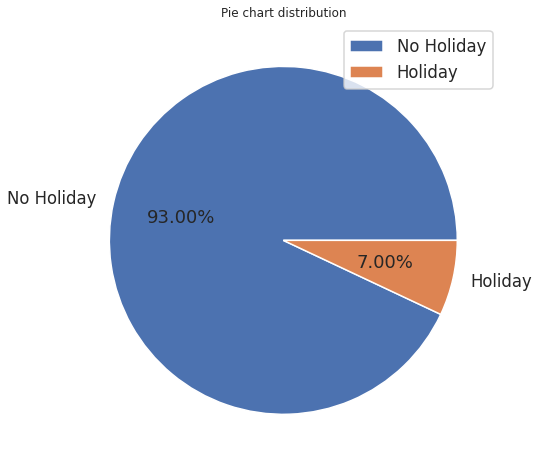

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(testing_df['IsHoliday'].value_counts(),labels=['No Holiday','Holiday'],autopct='%0.2f%%')
plt.title("Pie chart distribution",fontsize=12)
plt.legend()
plt.savefig('holidayDist.png',bbox_inches="tight",dpi=600)
plt.show()

In [ ]:

#weekly sales for 2011
#df = weekly_sales2010
#fig = px.line(df1, x='Week', y='mean')

#fig.show()

In [ ]:
#Downloading of the csv files to do data processing in excel to create a plot
"""weekly_sales2010.to_csv('weekly.csv')
weekly_sales2011.to_csv('weekly1.csv')
weekly_sales2012.to_csv('weekly2.csv')"""

"weekly_sales2010.to_csv('weekly.csv')\nweekly_sales2011.to_csv('weekly1.csv')\nweekly_sales2012.to_csv('weekly2.csv')"

In [ ]:
"""weekly_sales.to_csv('week.csv')"""

"weekly_sales.to_csv('week.csv')"

In [ ]:
"""files.download('week.csv')"""

"files.download('week.csv')"

In [ ]:
#Reading the modeled files
"""files.download('weekly2.csv')
df2=pd.read_csv('weekly2.csv')"""

"files.download('weekly2.csv')\ndf2=pd.read_csv('weekly2.csv')"

In [ ]:
#Weekly Sales comparision using plotly multiple years
weeklysales_comparision=pd.read_csv('weekly_merge.csv')
fig = px.line(weeklysales_comparision, x='Week', y=weeklysales_comparision.columns[1:4])
fig.show()

In [ ]:
total_weeklysales=pd.read_csv('week.csv')


In [ ]:
"""fig = px.line(total_weeklysales, x='Year', y=total_weeklysales.columns[2:3])
fig.show()"""

"fig = px.line(total_weeklysales, x='Year', y=total_weeklysales.columns[2:3])\nfig.show()"

In [ ]:
total_weeklysales.columns[2:4]

Index(['mean', 'median'], dtype='object')

In [ ]:
testing_df.shape

(418654, 19)

In [ ]:
"""testing_df['ds']=testing_df['Date']
testing_df['y']=testing_df['Weekly_Sales']"""

"testing_df['ds']=testing_df['Date']\ntesting_df['y']=testing_df['Weekly_Sales']"

In [ ]:
"""m=Prophet()
model=m.fit(testing_df)"""

'm=Prophet()\nmodel=m.fit(testing_df)'

In [ ]:
"""
future=m.make_future_dataframe(periods=100)
forecast=m.predict(future)
forecast.tail()
plot1=m.plot(forecast)
"""


'\nfuture=m.make_future_dataframe(periods=100)\nforecast=m.predict(future)\nforecast.tail()\nplot1=m.plot(forecast)\n'

In [ ]:
"""weekly_sale2010 = testing_df.loc[testing_df['Year']==2010].groupby(['Week'])
traindf=pd.read_csv("train.csv")
trains=traindf.groupby(['Date'])
traindf.head(2)"""

'weekly_sale2010 = testing_df.loc[testing_df[\'Year\']==2010].groupby([\'Week\'])\ntraindf=pd.read_csv("train.csv")\ntrains=traindf.groupby([\'Date\'])\ntraindf.head(2)'

In [ ]:
#files.download("holidayDist.png")

In [ ]:
testing_df.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Week,Year,Month
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,5,2010,2
1,1,2,2010-02-05,50605.27,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,5,2010,2


In [ ]:
testing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418654 entries, 0 to 418653
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         418654 non-null  int64         
 1   Dept          418654 non-null  int64         
 2   Date          418654 non-null  datetime64[ns]
 3   Weekly_Sales  418654 non-null  float64       
 4   IsHoliday     418654 non-null  bool          
 5   Temperature   418654 non-null  float64       
 6   Fuel_Price    418654 non-null  float64       
 7   MarkDown1     418654 non-null  float64       
 8   MarkDown2     418654 non-null  float64       
 9   MarkDown3     418654 non-null  float64       
 10  MarkDown4     418654 non-null  float64       
 11  MarkDown5     418654 non-null  float64       
 12  CPI           418654 non-null  float64       
 13  Unemployment  418654 non-null  float64       
 14  Type          418654 non-null  object        
 15  Size          418

In [ ]:
stats = testing_df.groupby(['Store', 'Dept']).Weekly_Sales.agg(['max', 'min', 'mean', 'median', 'std']).reset_index()


In [ ]:
stats.isnull().sum()

Store      0
Dept       0
max        0
min        0
mean       0
median     0
std       40
dtype: int64

In [ ]:
stats.shape

(3323, 7)

In [ ]:
stats_merged_data=pd.merge(left=testing_df,right=stats,how='left',on=['Store','Dept'])

In [ ]:
stats_merged_data.shape

(418654, 24)

In [ ]:
stats_merged_data.head(1)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Type,Size,Week,Year,Month,max,min,mean,median,std
0,1,1,2010-02-05,24924.5,False,42.31,2.572,0.0,0.0,0.0,...,A,151315,5,2010,2,57592.12,14537.37,22513.322937,18535.48,9854.349032


In [ ]:
stats_merged_data["Total Deal"]=stats_merged_data['MarkDown1']+stats_merged_data['MarkDown2']+stats_merged_data['MarkDown3']+stats_merged_data['MarkDown4']+stats_merged_data['MarkDown5']

In [ ]:
stats_merged_data.shape

(418654, 25)

In [ ]:
stats_merged_data.isna().sum()

Store            0
Dept             0
Date             0
Weekly_Sales     0
IsHoliday        0
Temperature      0
Fuel_Price       0
MarkDown1        0
MarkDown2        0
MarkDown3        0
MarkDown4        0
MarkDown5        0
CPI              0
Unemployment     0
Type             0
Size             0
Week             0
Year             0
Month            0
max              0
min              0
mean             0
median           0
std             40
Total Deal       0
dtype: int64

In [ ]:
stats_merged_data=stats_merged_data.dropna()

In [ ]:
stats_merged_data.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
Week            0
Year            0
Month           0
max             0
min             0
mean            0
median          0
std             0
Total Deal      0
dtype: int64

In [ ]:
stats_merged_data_dateless=stats_merged_data.drop('Date',axis=1)

In [ ]:
partial_dataset=stats_merged_data_dateless[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','Weekly_Sales']]

In [ ]:
partial_dataset.shape

(418614, 6)

One Hot Encoding 

In [ ]:
"""from pyod.models.knn import KNN
KNN_model = KNN(contamination=0.01)
KNN_model.fit(partial_dataset)

outlier_labels = KNN_model.labels_
number_of_outliers = len(outlier_labels[outlier_labels == 1])
print(number_of_outliers)
outliers = partial_dataset.iloc[outlier_labels == 1]
outliers"""

'from pyod.models.knn import KNN\nKNN_model = KNN(contamination=0.01)\nKNN_model.fit(partial_dataset)\n\noutlier_labels = KNN_model.labels_\nnumber_of_outliers = len(outlier_labels[outlier_labels == 1])\nprint(number_of_outliers)\noutliers = partial_dataset.iloc[outlier_labels == 1]\noutliers'

In [ ]:
stats_merged_data=stats_merged_data.set_index('Date')

In [ ]:
dfs=stats_merged_data[['Store','Dept','Type']]

In [ ]:
stats_merged_data.shape

(418614, 24)

In [ ]:
dfs

,Store,Dept,Type
Date,,,
2010-02-05,1,1,A
2010-02-05,1,2,A
2010-02-05,1,3,A
2010-02-05,1,4,A
2010-02-05,1,5,A
...,...,...,...
2012-10-26,45,93,B
2012-10-26,45,94,B
2012-10-26,45,95,B


In [ ]:
dfa=pd.get_dummies(dfs,columns=['Store','Dept','Type'])

In [ ]:
dfa.shape

(418614, 129)

In [ ]:
final_df=pd.concat([stats_merged_data,dfa],axis=1)

In [ ]:
final_df=final_df.drop(['Store','Dept','Type'],axis=1)

In [ ]:
final_df.shape

(418614, 150)

In [ ]:
final_df.head(1)

,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,...,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_A,Type_B,Type_C
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,24924.5,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
cols = ['Weekly_Sales','Size','Temperature','Fuel_Price','CPI','Unemployment','Total Deal','max','min','mean','median','std','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']

In [ ]:
"""minmaxdata=final_df[cols]
minmaxdata.shape
final_df.shape
scaler=MinMaxScaler(feature_range=(0,1))
def norm(data,cols):
  for i in cols:
    x = data[i]
    x = np.array(x)
    data[i] = scaler.fit_transform(x.reshape(len(x),1))
  return data
norm_final_data = norm(final_df,cols)
norm_final_data.shape
correlation=norm_final_data[cols]
fig, xl = plt.subplots(figsize=(20, 8))
sns.heatmap(norm_final_data[cols],annot=True)
plt.show()
features = norm_final_data.columns.difference(['Weekly_Sales'])
features"""

features=final_df.columns.difference(['Weekly_Sales'])

#Feature Importance

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
radm_clf = RandomForestRegressor(oob_score=True,n_estimators=23)
radm_clf.fit(final_df[features], final_df['Weekly_Sales'])

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.



RandomForestRegressor(n_estimators=23, oob_score=True)

In [ ]:
indices = np.argsort(radm_clf.feature_importances_)[::-1]
feature_list = pd.DataFrame(columns = ['rank', 'feature', 'importance'])
for f in range(final_df[features].shape[1]):
    feature_list.loc[f] = [f+1,
                           final_df[features].columns[indices[f]],
                           radm_clf.feature_importances_[indices[f]]]

feature_list

,rank,feature,importance
0,1,mean,8.868380e-01
1,2,Week,2.385544e-02
2,3,median,2.070085e-02
3,4,max,1.393120e-02
4,5,std,7.489043e-03
...,...,...,...
144,145,Dept_51,1.280280e-10
145,146,Dept_45,7.546908e-11
146,147,Dept_78,1.421945e-12
147,148,Dept_39,1.505571e-13


In [ ]:
x=feature_list.loc[0:22,['feature']]
x=x['feature'].tolist()
print(x)

['mean', 'Week', 'median', 'max', 'std', 'Temperature', 'CPI', 'Fuel_Price', 'Month', 'min', 'Unemployment', 'MarkDown3', 'Dept_72', 'IsHoliday', 'MarkDown4', 'MarkDown5', 'MarkDown1', 'Dept_7', 'Total Deal', 'Size', 'MarkDown2', 'Dept_3', 'Dept_16']


# Linear Regression


In [ ]:
X=final_df[x]
Target=final_df['Weekly_Sales']
df=pd.concat([X,Target],axis=1)

In [ ]:
df

,mean,Week,median,max,std,Temperature,CPI,Fuel_Price,Month,min,...,MarkDown4,MarkDown5,MarkDown1,Dept_7,Total Deal,Size,MarkDown2,Dept_3,Dept_16,Weekly_Sales
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,22513.322937,5,18535.480,57592.12,9854.349032,42.31,211.096358,2.572,2,14537.37,...,0.00,0.00,0.00,0,0.00,151315,0.00,0,0,24924.50
2010-02-05,46102.090420,5,45561.850,65615.36,3440.673222,42.31,211.096358,2.572,2,35819.83,...,0.00,0.00,0.00,0,0.00,151315,0.00,0,0,50605.27
2010-02-05,13150.478042,5,10366.850,51159.17,8708.978853,42.31,211.096358,2.572,2,6165.73,...,0.00,0.00,0.00,0,0.00,151315,0.00,1,0,13740.12
2010-02-05,36964.154476,5,36579.960,47893.23,2930.698313,42.31,211.096358,2.572,2,32497.43,...,0.00,0.00,0.00,0,0.00,151315,0.00,0,0,39954.04
2010-02-05,24257.941119,5,21183.420,85676.09,11330.286495,42.31,211.096358,2.572,2,11570.27,...,0.00,0.00,0.00,0,0.00,151315,0.00,0,0,32229.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-26,2728.627133,43,2609.360,6551.12,907.044076,58.85,192.308899,3.882,10,1147.54,...,211.94,858.33,4018.91,0,5247.26,118221,58.08,0,0,2487.80
2012-10-26,3690.272090,43,4120.155,7639.88,1852.287364,58.85,192.308899,3.882,10,0.98,...,211.94,858.33,4018.91,0,5247.26,118221,58.08,0,0,5203.31
2012-10-26,52896.166643,43,52417.470,75204.77,5117.961708,58.85,192.308899,3.882,10,41131.42,...,211.94,858.33,4018.91,0,5247.26,118221,58.08,0,0,56017.47


Train Test Split

In [ ]:
X=df.drop(['Weekly_Sales'],axis=1)
Y=df.Weekly_Sales

In [ ]:
X.head(2)

,mean,Week,median,max,std,Temperature,CPI,Fuel_Price,Month,min,...,IsHoliday,MarkDown4,MarkDown5,MarkDown1,Dept_7,Total Deal,Size,MarkDown2,Dept_3,Dept_16
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,22513.322937,5,18535.48,57592.12,9854.349032,42.31,211.096358,2.572,2,14537.37,...,False,0.0,0.0,0.0,0,0.0,151315,0.0,0,0
2010-02-05,46102.090420,5,45561.85,65615.36,3440.673222,42.31,211.096358,2.572,2,35819.83,...,False,0.0,0.0,0.0,0,0.0,151315,0.0,0,0


In [ ]:
X.shape

(418614, 23)

In [ ]:
Y.head(2)

Date
2010-02-05    24924.50
2010-02-05    50605.27
Name: Weekly_Sales, dtype: float64

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.20, random_state=50)

In [ ]:
lr = LinearRegression(normalize=False)
lr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.



LinearRegression(normalize=False)

In [ ]:
lr_acc = lr.score(X_test,y_test)

In [ ]:
lr_acc

0.8971259197446751

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
print("MAE" , mean_absolute_error(y_test, y_pred))
print("MSE" , mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2" , explained_variance_score(y_test, y_pred))

MAE 2795.031310681142
MSE 53808848.93992352
RMSE 7335.45151575031
R2 0.8971264130717426


In [ ]:
test_score = lr.score(X_test, y_test)*100

In [ ]:
print(test_score)

89.71259197446751


In [ ]:
y_test.head()

Date
2012-04-20     2059.56
2012-03-30    85896.75
2011-07-01    12907.11
2010-08-13    55962.13
2012-08-17    13445.48
Name: Weekly_Sales, dtype: float64

In [ ]:
import lightgbm as lgb

In [ ]:
model = lgb.LGBMRegressor(n_estimators=2000,
        learning_rate=0.3,
        subsample=0.8,
        colsample_bytree=0.8,
        max_depth=10,
        num_leaves=50,
        min_child_weight=300)

In [ ]:
model.fit(X_train, y_train, eval_set=[(X_train,y_train),(X_test,y_test)],
             eval_metric='rmse', verbose=20, early_stopping_rounds=20)

Training until validation scores don't improve for 20 rounds.
[20]	training's rmse: 4908.56	training's l2: 2.4094e+07	valid_1's rmse: 5398.05	valid_1's l2: 2.91389e+07
[40]	training's rmse: 4393.75	training's l2: 1.9305e+07	valid_1's rmse: 4864.54	valid_1's l2: 2.36637e+07
[60]	training's rmse: 4143.28	training's l2: 1.71667e+07	valid_1's rmse: 4624.6	valid_1's l2: 2.1387e+07
[80]	training's rmse: 3957.23	training's l2: 1.56596e+07	valid_1's rmse: 4439.19	valid_1's l2: 1.97064e+07
[100]	training's rmse: 3832.06	training's l2: 1.46847e+07	valid_1's rmse: 4335.36	valid_1's l2: 1.87954e+07
[120]	training's rmse: 3713.43	training's l2: 1.37895e+07	valid_1's rmse: 4220.14	valid_1's l2: 1.78096e+07
[140]	training's rmse: 3622.1	training's l2: 1.31196e+07	valid_1's rmse: 4143.23	valid_1's l2: 1.71663e+07
[160]	training's rmse: 3543.39	training's l2: 1.25556e+07	valid_1's rmse: 4073.85	valid_1's l2: 1.65962e+07
[180]	training's rmse: 3487.98	training's l2: 1.2166e+07	valid_1's rmse: 4031.03	va

LGBMRegressor(colsample_bytree=0.8, learning_rate=0.3, max_depth=10,
              min_child_weight=300, n_estimators=2000, num_leaves=50,
              subsample=0.8)

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
rmse_test_lightGBM = mean_squared_error(y_test, y_pred) ** 0.5

In [ ]:
rmse_test_lightGBM

3283.3069995194505

In [ ]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

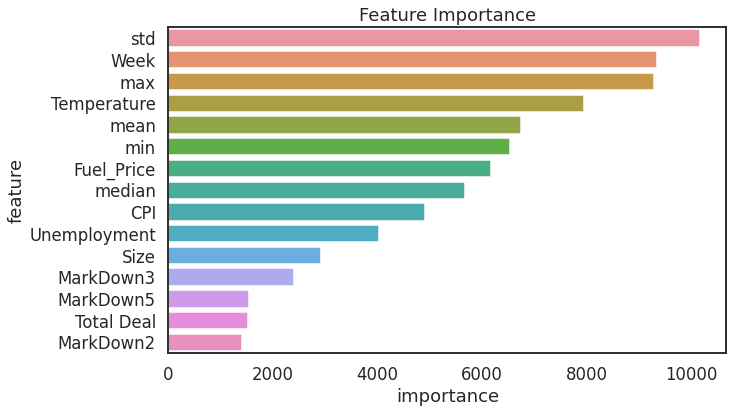

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(15), x='importance', y='feature');
plt.savefig('fetureImpLightGBM.pdf')

In [ ]:
print(y_pred)

[ 2232.78434425 88049.38927625 12934.85737985 ...  8150.99116794
  3549.48162661 64231.74673356]


In [ ]:
df2=final_df

In [ ]:
dfm=df2[['std','Week','max','Temperature','mean','min','Fuel_Price','median','CPI','Unemployment','Size','MarkDown3','MarkDown5','Total Deal','MarkDown2','Weekly_Sales']]

In [ ]:
X=dfm.drop(['Weekly_Sales'],axis=1)
Y=dfm.Weekly_Sales
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.20, random_state=50)

In [ ]:
model = lgb.LGBMRegressor(n_estimators=2000,
        learning_rate=0.3,
        subsample=0.8,
        colsample_bytree=0.8,
        max_depth=10,
        num_leaves=50,
        min_child_weight=300,
        )

In [ ]:
model.fit(X_train, y_train, eval_set=[(X_train,y_train),(X_test,y_test)],
             eval_metric='rmse', verbose=40, early_stopping_rounds=20)

Training until validation scores don't improve for 20 rounds.
[40]	training's rmse: 4677.53	training's l2: 2.18793e+07	valid_1's rmse: 5213.86	valid_1's l2: 2.71843e+07
[80]	training's rmse: 4246.23	training's l2: 1.80305e+07	valid_1's rmse: 4801.62	valid_1's l2: 2.30556e+07
[120]	training's rmse: 4026.45	training's l2: 1.62123e+07	valid_1's rmse: 4626.06	valid_1's l2: 2.14004e+07
[160]	training's rmse: 3862.03	training's l2: 1.49153e+07	valid_1's rmse: 4484.78	valid_1's l2: 2.01133e+07
[200]	training's rmse: 3713.18	training's l2: 1.37877e+07	valid_1's rmse: 4361.64	valid_1's l2: 1.90239e+07
[240]	training's rmse: 3596.92	training's l2: 1.29379e+07	valid_1's rmse: 4278.86	valid_1's l2: 1.83086e+07
[280]	training's rmse: 3506.37	training's l2: 1.22946e+07	valid_1's rmse: 4216.45	valid_1's l2: 1.77785e+07
[320]	training's rmse: 3439.74	training's l2: 1.18318e+07	valid_1's rmse: 4173.76	valid_1's l2: 1.74202e+07
[360]	training's rmse: 3368.5	training's l2: 1.13468e+07	valid_1's rmse: 412

LGBMRegressor(colsample_bytree=0.8, learning_rate=0.3, max_depth=10,
              min_child_weight=300, n_estimators=2000, num_leaves=50,
              subsample=0.8)

In [ ]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError

In [ ]:
model = Sequential([
  Dense(480, kernel_initializer='normal', activation='elu'),
  Dropout(0.2),
  Dense(256, kernel_initializer='normal', activation='elu'),
  Dropout(0.2),
  Dense(256, kernel_initializer='normal', activation='elu'),
  Dropout(0.2),
  Dense(256, kernel_initializer='normal', activation='elu'),
  Dropout(0.2),
  Dense(128, kernel_initializer='normal', activation='elu'),
  Dropout(0.2),
  Dense(64, kernel_initializer='normal', activation='elu'),
  Dropout(0.2),
  
  Dense(32, kernel_initializer='normal', activation='elu'),
  Dropout(0.2),

  Dense(1, kernel_initializer='normal', activation='linear')
  ])

In [ ]:
from keras import backend as K

In [ ]:
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [ ]:
model.compile(
    loss=root_mean_squared_error, 
    optimizer=#tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9),
    tf.keras.optimizers.Adamax(learning_rate=0.01), 
    metrics=[root_mean_squared_error]
)

In [ ]:
history = model.fit(
    X_train, 
    y_train, 
    epochs=100,
    batch_size=256
)

Epoch 1/100
1309/1309 [==============================] - 12s 6ms/step - loss: 9594.1924 - root_mean_squared_error: 9592.2773
Epoch 2/100
1309/1309 [==============================] - 8s 6ms/step - loss: 8760.2314 - root_mean_squared_error: 8758.1318
Epoch 3/100
1309/1309 [==============================] - 8s 6ms/step - loss: 8526.4580 - root_mean_squared_error: 8523.8213
Epoch 4/100
1309/1309 [==============================] - 8s 6ms/step - loss: 8497.7939 - root_mean_squared_error: 8497.3408
Epoch 5/100
1309/1309 [==============================] - 8s 6ms/step - loss: 8446.4248 - root_mean_squared_error: 8445.2803
Epoch 6/100
1309/1309 [==============================] - 8s 6ms/step - loss: 8433.6172 - root_mean_squared_error: 8431.9521
Epoch 7/100
1309/1309 [==============================] - 8s 6ms/step - loss: 8456.5928 - root_mean_squared_error: 8458.6865
Epoch 8/100
1309/1309 [==============================] - 8s 6ms/step - loss: 8448.3193 - root_mean_squared_error: 8446.4385
Epoch 9

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'root_mean_squared_error'])


In [ ]:
#!pip install ann_visualizer

# Multi Model Test for selecting the best model 

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

print(X_train.shape)
print(X_test.shape)

(334891, 15)
(83723, 15)


In [ ]:
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import BayesianRidge, LinearRegression
import xgboost as xgb
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import cross_validate, train_test_split
from statistics import mean
from sklearn.model_selection import KFold

In [ ]:
kfold = KFold(n_splits=5)



models = {
    
    'xgboost' : xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 10),
    'Bayesian' : BayesianRidge(),
    'LinearRegression': LinearRegression(),
    'DecisionTreeRegressor': DecisionTreeRegressor(random_state=1),
    'AdaBoostRegressor' : AdaBoostRegressor(n_estimators=50, learning_rate=.1, loss='square'),
    'ExtraTreesRegressor': ExtraTreesRegressor(n_estimators=50, max_features='auto', random_state=35),
    'RandomForestRegressor': RandomForestRegressor(n_estimators=50, random_state=35),
}

for model_name, model in models.items():
    results = cross_validate(model, X,Y , cv=kfold, scoring=['neg_mean_absolute_error'], return_estimator=False)
    print(model_name, mean(results['test_neg_mean_absolute_error']), mean(results['fit_time']), mean(results['score_time']))

xgboost -6472.237424326811 4.553889274597168 0.11572737693786621
Bayesian -2796.3238333288423 0.677701187133789 0.019845962524414062
LinearRegression -2796.6798091264313 0.30582075119018554 0.01801018714904785
DecisionTreeRegressor -3103.3879870012343 8.655468702316284 0.04402084350585937
AdaBoostRegressor -4645.9991048649845 54.33202390670776 0.29994974136352537
ExtraTreesRegressor -2186.8983634524443 66.02945952415466 1.330669641494751
RandomForestRegressor -2242.444555165158 213.87400417327882 1.8656529903411865


In [ ]:
extratreeregressor = ExtraTreesRegressor(n_estimators=50, max_features='auto', random_state=35)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=35)
extratreeregressor.fit(X_train, y_train)
y_pred = extratreeregressor.predict(X_test)
etr_mae=mean_absolute_error(y_test, y_pred)

In [ ]:
print("MAE" , mean_absolute_error(y_test, y_pred))
print("MSE" , mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2" , explained_variance_score(y_test, y_pred))
print("Score",extratreeregressor.score(X_train,y_train))

MAE 1433.9204801547965
MSE 16669574.338723268
RMSE 4082.8390047518733
R2 0.9676006022959179
Score 0.9999999999844177


In [ ]:
etr_pred=y_pred

In [ ]:

etr_mae=mean_absolute_error(y_test, y_pred)
etr_mse=mean_squared_error(y_test, y_pred)
etr_rmse=np.sqrt(mean_squared_error(y_test, y_pred))
etr_r2=explained_variance_score(y_test, y_pred)
print("extra",etr_mae)

extra 1433.9204801547965


In [ ]:
linearRegression=LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=35)
linearRegression.fit(X_train, y_train)
y_pred = linearRegression.predict(X_test)


In [ ]:
lr_pred=y_pred

In [ ]:
print("MAE" , mean_absolute_error(y_test, y_pred))
print("MSE" , mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2" , explained_variance_score(y_test, y_pred))
print("Score",linearRegression.score(X_train,y_train))

MAE 2793.3123773056013
MSE 48145634.95362221
RMSE 6938.705567584073
R2 0.9064176503876149
Score 0.9042939170659989


In [ ]:
lr_mae=mean_absolute_error(y_test, y_pred)
lr_mse=mean_squared_error(y_test, y_pred)
lr_rmse=np.sqrt(mean_squared_error(y_test, y_pred))
lr_r2=explained_variance_score(y_test, y_pred)
print("extra",lr_mae)

extra 2793.3123773056013


In [ ]:
dtRegressor=DecisionTreeRegressor(random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=35)
dtRegressor.fit(X_train, y_train)
y_pred = dtRegressor.predict(X_test)


In [ ]:
dt_pred=y_pred

In [ ]:
print("MAE" , mean_absolute_error(y_test, y_pred))
print("MSE" , mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2" , explained_variance_score(y_test, y_pred))
print("Score",dtRegressor.score(X_train,y_train))

MAE 1905.5605028486793
MSE 30094294.885353938
RMSE 5485.826727609426
R2 0.9415041508265806
Score 1.0


In [ ]:
dt_mae=mean_absolute_error(y_test, y_pred)
dt_mse=mean_squared_error(y_test, y_pred)
dt_rmse=np.sqrt(mean_squared_error(y_test, y_pred))
dt_r2=explained_variance_score(y_test, y_pred)
print("extra",dt_mae)

extra 1905.5605028486793


In [ ]:
import math
rf = RandomForestRegressor(n_estimators=50, max_depth=25)
rf.fit(X_train,y_train)
predict=rf.predict(X_test)
print(math.sqrt(mean_squared_error(y_test, predict)))

3693.3511165265736


In [ ]:
print("MAE" , mean_absolute_error(y_test, predict))
print("MSE" , mean_squared_error(y_test, predict))
print("RMSE" , np.sqrt(mean_squared_error(y_test, predict)))
print("R2" , explained_variance_score(y_test, predict))
print("Score",rf.score(X_train,y_train))

MAE 1433.619854540965
MSE 13640842.469948089
RMSE 3693.3511165265736
R2 0.9734869918709279
Score 0.9953125966631043


In [ ]:
rf_pred=predict

In [ ]:
rf_mae=mean_absolute_error(y_test, predict)
rf_mse=mean_squared_error(y_test, predict)
rf_rmse=np.sqrt(mean_squared_error(y_test, predict))
rf_r2=explained_variance_score(y_test, predict)
print("extra",rf_mae)

extra 1433.619854540965


In [ ]:
from xgboost import XGBRegressor
xgmodel = XGBRegressor(random_state=48, n_jobs=-1, n_estimators=20, max_depth=12)
xgmodel.fit(X_train,y_train)
predictions=xgmodel.predict(X_test)
print(math.sqrt(mean_squared_error(y_test, predictions)))

[10:44:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
5300.488529507935


In [ ]:
print("MAE" , mean_absolute_error(y_test, predictions))
print("MSE" , mean_squared_error(y_test, predictions))
print("RMSE" , np.sqrt(mean_squared_error(y_test, predictions)))
print("R2" , explained_variance_score(y_test, predictions))
print("Score",xgmodel.score(X_train,y_train))

MAE 2481.859444250059
MSE 28095178.65144519
RMSE 5300.488529507935
R2 0.9532937554856596
Score 0.9554673158838949


In [ ]:
xgb_mae=mean_absolute_error(y_test, predictions)
xgb_mse=mean_squared_error(y_test, predictions)
xgb_rmse=np.sqrt(mean_squared_error(y_test, predictions))
xgb_r2=explained_variance_score(y_test, predictions)
print("extra",xgb_mae)

extra 2481.859444250059


In [ ]:
xgb_pred=predictions

# Using PCA on the best model till now.

In [ ]:
from sklearn.decomposition import PCA

A=dfm.drop(['Weekly_Sales'],axis=1)
"""B=dfm.Weekly_Sales"""



'B=dfm.Weekly_Sales'

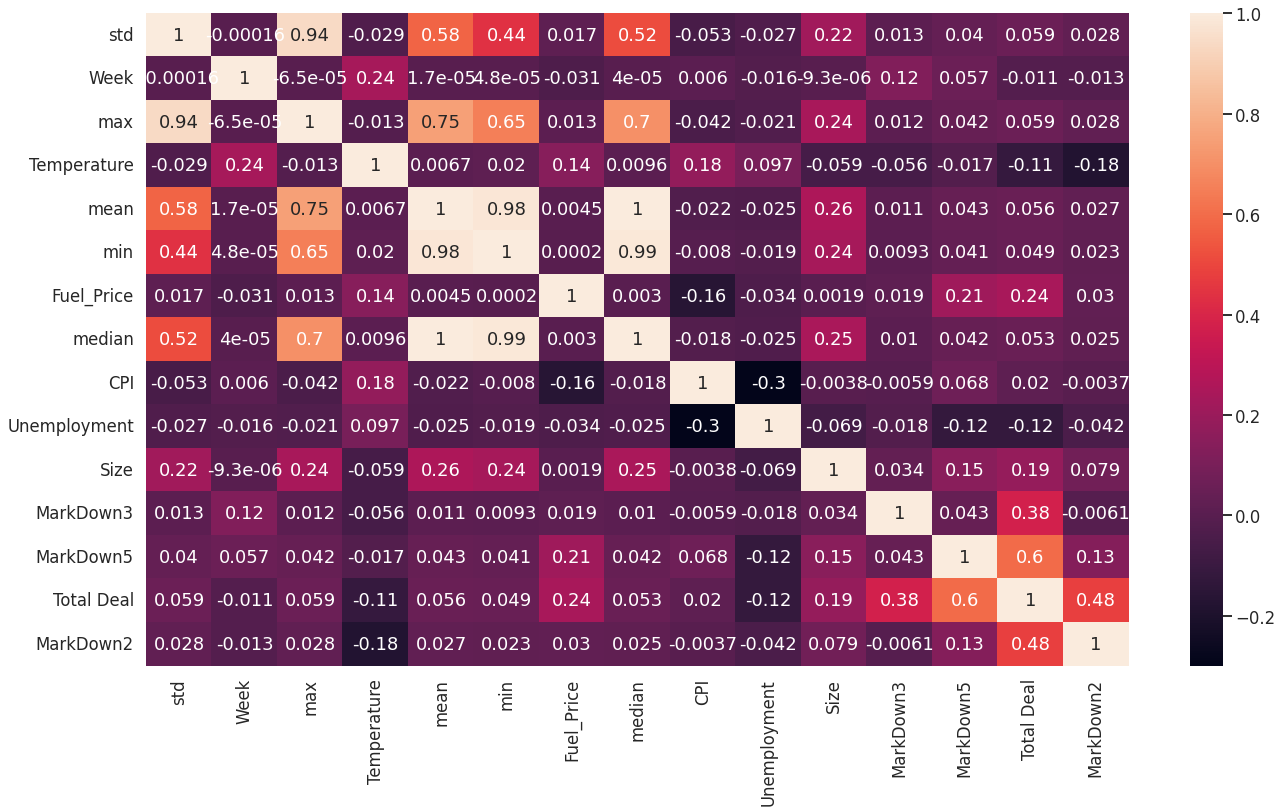

In [ ]:
fig, xl = plt.subplots(figsize=(22, 12))
sns.heatmap(A.corr(),annot=True)
plt.show()

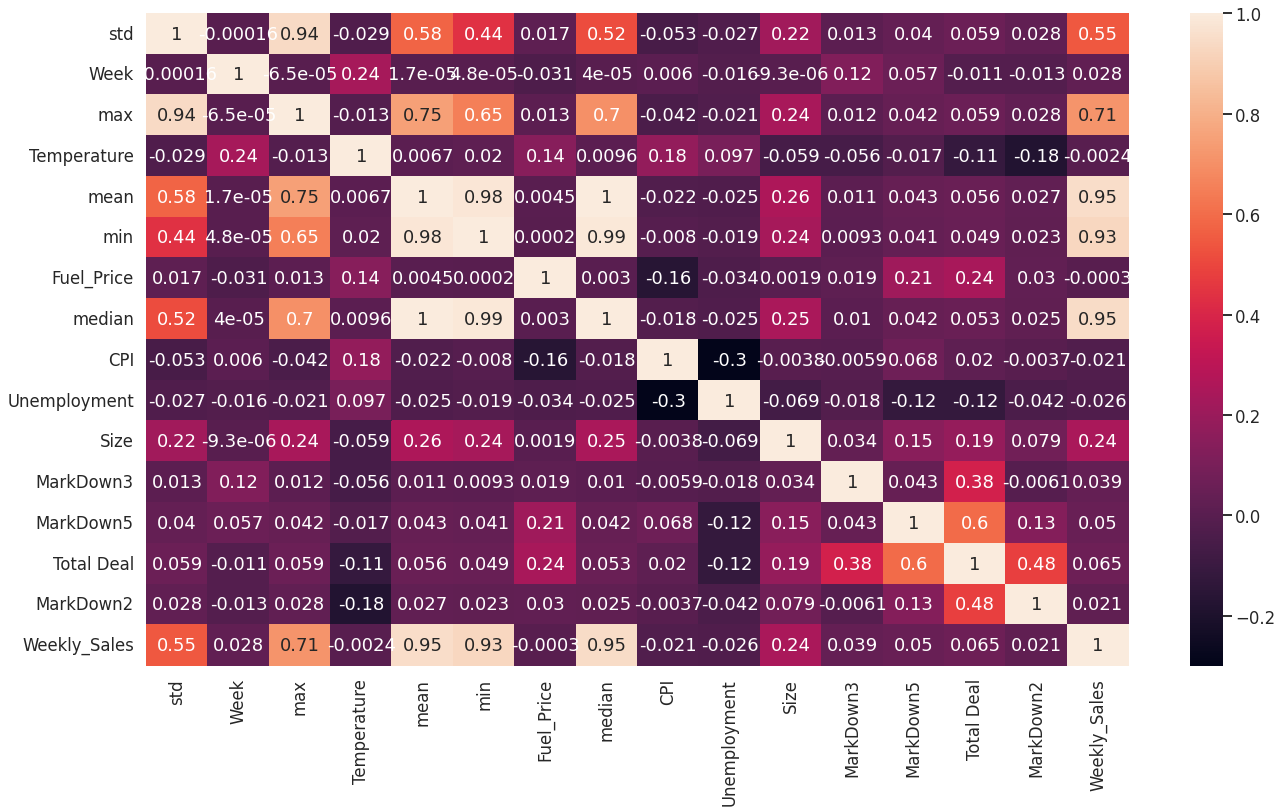

In [ ]:
fig, xl = plt.subplots(figsize=(22, 12))
sns.heatmap(dfm.corr(),annot=True)
plt.show()

In [ ]:
#dropping the markdowns CPI and unemployment due to low corelation with weekly sales
A=dfm.drop(['CPI','Unemployment','MarkDown2','MarkDown5'],axis=1)
B=dfm.Weekly_Sales

In [ ]:
A_test=dfm.drop(['CPI','Unemployment','MarkDown2','MarkDown5'],axis=1)
B_test=dfm.Weekly_Sales

Let's check for 10 components, how much data can we keep when doing the PCA , so that we can keep as much information as possible

In [ ]:

pca = PCA(n_components=10)
pca.fit(A_test)
pca_features = pca.transform(A_test)

columns = ['pca_%i' % i for i in range(10)]
A_test= pd.DataFrame(pca_features, columns=columns, index=A_test.index)

In [ ]:
var= pca.explained_variance_ratio_
cumvariances=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
print(cumvariances)

[ 56.6  89.7  96.5  99.1  99.6  99.9 100.  100.  100.  100. ]


([<matplotlib.axis.XTick at 0x7f439c58b490>,
 [Text(0, 0, '1'),
  Text(0, 0, '2'),
  Text(0, 0, '3'),
  Text(0, 0, '4'),
  Text(0, 0, '5'),
  Text(0, 0, '6'),
  Text(0, 0, '7'),
  Text(0, 0, '8'),
  Text(0, 0, '9'),
  Text(0, 0, '10')])

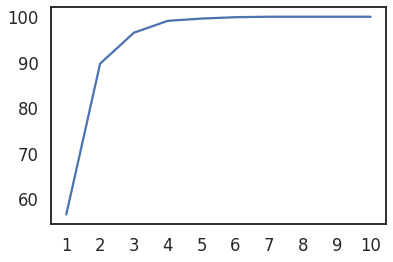

In [ ]:
plt.plot(cumvariances)
plt.xticks(np.arange(len(cumvariances)), np.arange(1, len(cumvariances)+1))

As for 5 components it is retrieving most information let's take PCA as 5 and apply them to the models

In [ ]:
pca = PCA(n_components=5)
pca.fit(A)
pca_features = pca.transform(A)

columns = ['pca_%i' % i for i in range(5)]
A= pd.DataFrame(pca_features, columns=columns, index=A.index)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(A, B, test_size=0.2, random_state=35)

In [ ]:
extratreeregressor_pca = ExtraTreesRegressor(n_estimators=50, max_features='auto', random_state=35)
X_train, X_test, y_train, y_test = train_test_split(A, B, test_size=0.2, random_state=35)
extratreeregressor_pca.fit(X_train, y_train)
y_pred = extratreeregressor_pca.predict(X_test)
mean_absolute_error(y_pred, y_test)

90.35893433584553

In [ ]:
print(y_test)

Date
2012-02-10      729.92
2010-09-17     7008.59
2011-08-26     2221.95
2012-06-22    33559.94
2010-10-15    94529.46
                ...   
2010-04-23    59261.02
2010-02-19     5422.56
2010-06-18     4580.82
2011-06-17      220.57
2010-07-30     6022.62
Name: Weekly_Sales, Length: 83723, dtype: float64


In [ ]:
print(y_pred)

[ 857.3172 7013.3512 2221.866  ... 4586.2704  225.7292 6022.9334]


In [ ]:
print("MAE" , mean_absolute_error(y_test, y_pred))
print("MSE" , mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2" , explained_variance_score(y_test, y_pred))

MAE 90.35893433584553
MSE 190008.1914083911
RMSE 435.89929044263323
R2 0.9996307772784141


In [ ]:
etr_mae_pca=mean_absolute_error(y_test, y_pred)
etr_mse_pca=mean_squared_error(y_test, y_pred)
etr_rmse_pca=np.sqrt(mean_squared_error(y_test, y_pred))
etr_r2_pca=explained_variance_score(y_test, y_pred)
print("extra",etr_mae_pca)

extra 90.35893433584553


In [ ]:
etr_pred_pca=y_pred

From the above we can see that there is a drastic improvement once PCA has been applied changing the RMSE value from 4082 to 485

In [ ]:
#!pip install wandb

# LGBM after PCA

In [ ]:
eval_result={}

In [ ]:
lgbmmodel = lgb.LGBMRegressor(n_estimators=2000,
        learning_rate=0.4,
        subsample=0.8,
        colsample_bytree=0.8,
        max_depth=10,
        num_leaves=50,
        min_child_weight=300,
        
        )




In [ ]:
lgbmhistory=lgbmmodel.fit(X_train, y_train, eval_set=[(X_train,y_train),(X_test,y_test)],
             eval_metric='rmse', verbose=40, early_stopping_rounds=200)

Training until validation scores don't improve for 200 rounds.
[40]	training's rmse: 2230.61	training's l2: 4.97561e+06	valid_1's rmse: 1889.47	valid_1's l2: 3.5701e+06
[80]	training's rmse: 1824.69	training's l2: 3.32948e+06	valid_1's rmse: 1598.13	valid_1's l2: 2.55403e+06
[120]	training's rmse: 1638.54	training's l2: 2.6848e+06	valid_1's rmse: 1490.51	valid_1's l2: 2.22161e+06
[160]	training's rmse: 1507.03	training's l2: 2.27114e+06	valid_1's rmse: 1416.63	valid_1's l2: 2.00684e+06
[200]	training's rmse: 1413.75	training's l2: 1.99868e+06	valid_1's rmse: 1376.85	valid_1's l2: 1.8957e+06
[240]	training's rmse: 1342.39	training's l2: 1.802e+06	valid_1's rmse: 1343.51	valid_1's l2: 1.80503e+06
[280]	training's rmse: 1272.76	training's l2: 1.61993e+06	valid_1's rmse: 1315.56	valid_1's l2: 1.7307e+06
[320]	training's rmse: 1216.09	training's l2: 1.47886e+06	valid_1's rmse: 1287.71	valid_1's l2: 1.65819e+06
[360]	training's rmse: 1167.32	training's l2: 1.36263e+06	valid_1's rmse: 1267.72

In [ ]:
y_pred=lgbmmodel.predict(X_test)

In [ ]:
print("MAE" , mean_absolute_error(y_test, y_pred))
print("MSE" , mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2" , explained_variance_score(y_test, y_pred))

MAE 351.5584447447704
MSE 1175962.2936489107
RMSE 1084.4179515523113
R2 0.9977142029176146


In [ ]:
lgbm_pred_pca=y_pred
lgbm_mae_pca=mean_absolute_error(y_test, y_pred)
lgbm_mse_pca=mean_squared_error(y_test, y_pred)
lgbm_rmse_pca=np.sqrt(mean_squared_error(y_test, y_pred))
lgbm_r2_pca=explained_variance_score(y_test, y_pred)
print("extra",lgbm_mae_pca)

extra 351.5584447447704


# Random Forest with PCA

In [ ]:
import math
rf = RandomForestRegressor(n_estimators=50, max_depth=25)
rf.fit(X_train,y_train)
predict=rf.predict(X_test)
print(math.sqrt(mean_squared_error(y_test, predict)))

679.9855430740961


In [ ]:
rf_pred_pca=predict

In [ ]:
print("MAE" , mean_absolute_error(y_test, predict))
print("MSE" , mean_squared_error(y_test, predict))
print("RMSE" , np.sqrt(mean_squared_error(y_test, predict)))
print("R2" , explained_variance_score(y_test, predict))
print("Score",rf.score(X_train,y_train))

MAE 170.34073697584984
MSE 462380.33878977335
RMSE 679.9855430740961
R2 0.9991015963288535
Score 0.9998084744162876


In [ ]:
rf_mae_pca=mean_absolute_error(y_test, predict)
rf_mse_pca=mean_squared_error(y_test, predict)
rf_rmse_pca=np.sqrt(mean_squared_error(y_test, predict))
rf_r2_pca=explained_variance_score(y_test, predict)
print("extra",rf_mae_pca)

extra 170.34073697584984


# Decision Tree Regressor with PCA

In [ ]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train,y_train)
predictions = dt.predict(X_test)
print(math.sqrt(mean_squared_error(y_test, predictions)))

1087.1264568685945


In [ ]:
print("MAE" , mean_absolute_error(y_test, predictions))
print("MSE" , mean_squared_error(y_test, predictions))
print("RMSE" , np.sqrt(mean_squared_error(y_test, predictions)))
print("R2" , explained_variance_score(y_test, predictions))
print("Score",rf.score(X_train,y_train))

MAE 274.06512857876567
MSE 1181843.9332236638
RMSE 1087.1264568685945
R2 0.9977029500131163
Score 0.9997137363685933


In [ ]:
dt_pred_pca=predictions

In [ ]:
dt_mae_pca=mean_absolute_error(y_test, predictions)
dt_mse_pca=mean_squared_error(y_test, predictions)
dt_rmse_pca=np.sqrt(mean_squared_error(y_test, predictions))
dt_r2_pca=explained_variance_score(y_test, predictions)
print("extra",dt_mae_pca)

extra 274.06512857876567


# XGBoost Regressor with PCA

In [ ]:
from xgboost import XGBRegressor
xgmodel = XGBRegressor(random_state=48, n_jobs=-1, n_estimators=20, max_depth=12)
xgmodel.fit(X_train,y_train)
predictions=xgmodel.predict(X_test)
print(math.sqrt(mean_squared_error(y_test, predictions)))

[11:16:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
3676.37660836203


In [ ]:
print("MAE" , mean_absolute_error(y_test, predictions))
print("MSE" , mean_squared_error(y_test, predictions))
print("RMSE" , np.sqrt(mean_squared_error(y_test, predictions)))
print("R2" , explained_variance_score(y_test, predictions))
print("Score",rf.score(X_train,y_train))

MAE 2140.8435518743595
MSE 13515744.966511501
RMSE 3676.37660836203
R2 0.9813471191348172
Score 0.9997137363685933


In [ ]:
xgb_mae_pca=mean_absolute_error(y_test, predictions)
xgb_mse_pca=mean_squared_error(y_test, predictions)
xgb_rmse_pca=np.sqrt(mean_squared_error(y_test, predictions))
xgb_r2_pca=explained_variance_score(y_test, predictions)
print("extra",xgb_mae_pca)

extra 2140.8435518743595


In [ ]:
xgb_pred_pca=predictions

In [ ]:
X=dfm.drop(['Weekly_Sales'],axis=1)
Y=dfm.Weekly_Sales
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.20, random_state=35)

Comparision Charts

In [ ]:
actual_test=pd.DataFrame(y_test)
actual_test.reset_index(drop=True,inplace=True)

In [ ]:
#Creating multiple dataframes for charts
df_xgb=pd.DataFrame(xgb_pred_pca)
df_et=pd.DataFrame(etr_pred_pca)
df_lgbm=pd.DataFrame(lgbm_pred_pca)
df_dt=pd.DataFrame(dt_pred_pca)
df_rf=pd.DataFrame(rf_pred_pca)
df_tests=actual_test.copy()
df_tests['xgb']=df_xgb
df_tests['et']=df_et
df_tests['lgbm']=df_lgbm
df_tests['dt']=df_dt
df_tests['rf']=df_rf
df_tests['index']=df_tests.index

In [ ]:
df_tests

,Weekly_Sales,xgb,et,lgbm,dt,index,rf
0,729.92,977.800232,857.3172,1070.521819,991.22,0,777.830038
1,7008.59,5090.376953,7013.3512,7451.699758,7192.25,1,6513.426856
2,2221.95,2146.533691,2221.8660,2063.273637,2219.63,2,2237.564377
3,33559.94,29526.630859,33665.3598,34221.097982,34157.93,3,33616.215045
4,94529.46,83859.984375,94580.7748,94313.974246,94608.46,4,94663.145300
...,...,...,...,...,...,...,...
83718,59261.02,51471.773438,59243.0714,59946.809632,59157.08,83718,59279.224000
83719,5422.56,5528.038086,5292.1798,5353.904134,5386.00,83719,5525.860902
83720,4580.82,3643.608887,4586.2704,4273.549288,4599.30,83720,4581.270119
83721,220.57,321.335449,225.7292,209.851023,217.00,83721,259.565690


# Normal Plots

xgb

In [ ]:
import warnings
warnings.filterwarnings("ignore")

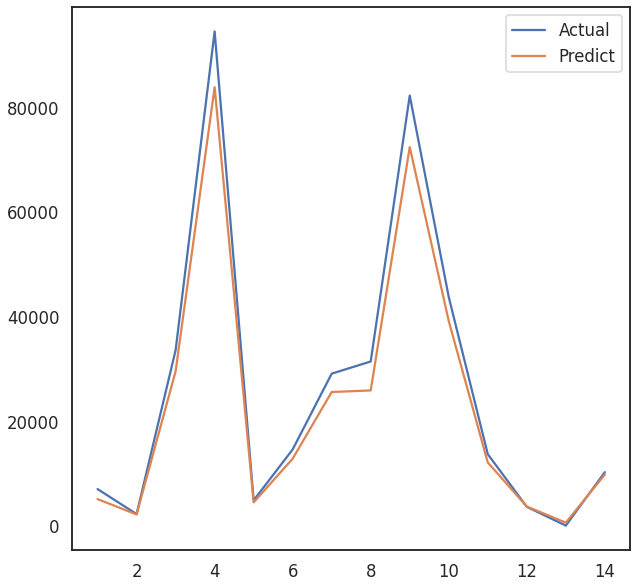

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
labels=['Actual', 'Predict']
colors=['r','g']
ax.plot(actual_test[1:15],label='Actual')
ax.plot(df_xgb[1:15],label='Predict')
ax.legend()
plt.show()

ExtraTreeRegressor


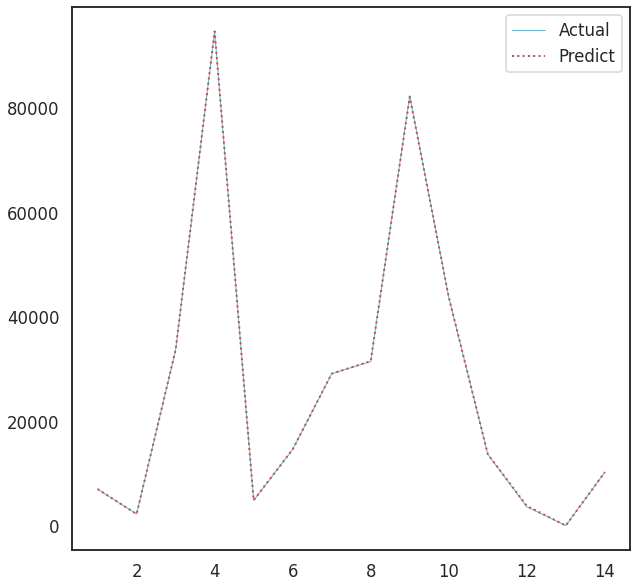

In [ ]:
#BEST MODEL
fig, ax = plt.subplots(figsize=(10,10))
labels=['Actual', 'Predict']
colors=['r','g']
ax.plot(actual_test[1:15],'c-',linewidth=1,label='Actual')
ax.plot(df_et[1:15],'r:',linewidth=2,label='Predict')
ax.legend()
plt.show()

LGBM


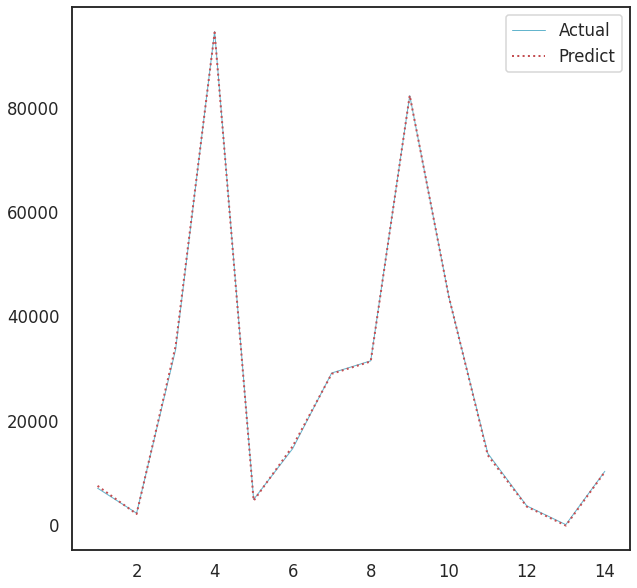

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
labels=['Actual', 'Predict']
colors=['r','g']
ax.plot(actual_test[1:15],'c-',linewidth=1,label='Actual')
ax.plot(df_lgbm[1:15],'r:',linewidth=2,label='Predict')
ax.legend()
plt.show()

Decision Tree

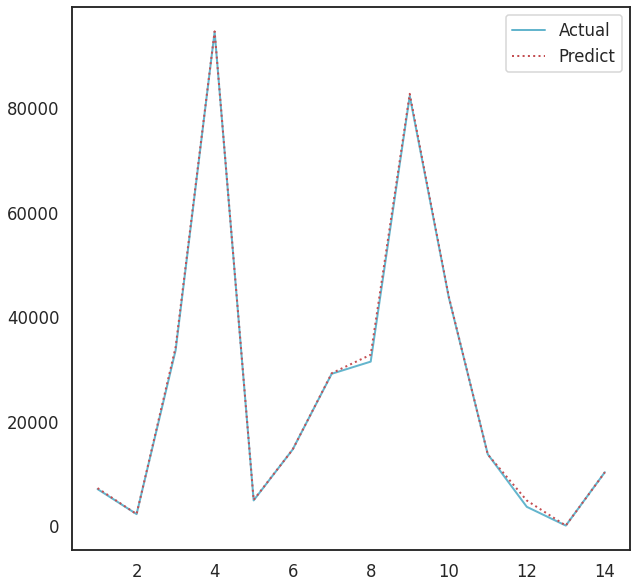

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
labels=['Actual', 'Predict']
colors=['r','g']
ax.plot(actual_test[1:15],'c-',linewidth=2,label='Actual')
ax.plot(df_dt[1:15],'r:',linewidth=2,label='Predict')
ax.legend()
plt.show()

Random Forest

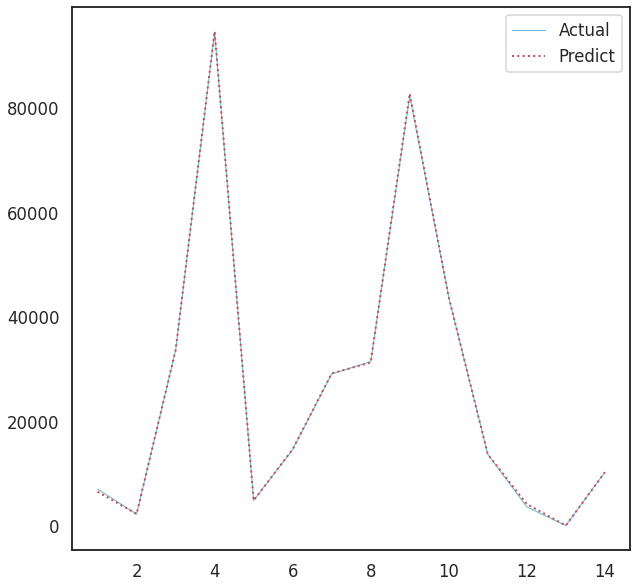

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
labels=['Actual', 'Predict']
colors=['r','g']
ax.plot(actual_test[1:15],'c-',linewidth=1,label='Actual')
ax.plot(df_rf[1:15],'r:',linewidth=2,label='Predict')
ax.legend()
plt.show()

# Plotly


XGB Regressor

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Scatter(x=df_tests['index'][1:15], y=df_tests['xgb'][1:15], name="Predict"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=df_tests['index'][1:15], y=df_tests['Weekly_Sales'][1:15], name="Actual"),
    secondary_y=True,
)

fig.update_yaxes(title_text="<b>primary</b> yaxis title", secondary_y=False)
fig.update_yaxes(title_text="<b>secondary</b> yaxis title", secondary_y=True)

fig.show()

ExtraTree Regressor

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(specs=[[{"secondary_y": True}]])


fig.add_trace(
    go.Scatter(x=df_tests['index'][1:15], y=df_tests['et'][1:15], name="Predict"),
    secondary_y=False,
)

# Graph2
fig.add_trace(
    go.Scatter(x=df_tests['index'][1:15], y=df_tests['Weekly_Sales'][1:15], name="Actual"),
    secondary_y=True,
)

fig.update_yaxes(title_text="<b>primary</b> yaxis title", secondary_y=False)
fig.update_yaxes(title_text="<b>secondary</b> yaxis title", secondary_y=True)

fig.show()

LGBM

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(specs=[[{"secondary_y": True}]])


fig.add_trace(
    go.Scatter(x=df_tests['index'][1:15], y=df_tests['lgbm'][1:15], name="Predict"),
    secondary_y=False,
)

# Graph2
fig.add_trace(
    go.Scatter(x=df_tests['index'][1:15], y=df_tests['Weekly_Sales'][1:15], name="Actual"),
    secondary_y=True,
)

fig.update_yaxes(title_text="<b>primary</b> yaxis title", secondary_y=False)
fig.update_yaxes(title_text="<b>secondary</b> yaxis title", secondary_y=True)

fig.show()

Decision Tree Regressor

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(specs=[[{"secondary_y": True}]])


fig.add_trace(
    go.Scatter(x=df_tests['index'][1:15], y=df_tests['dt'][1:15], name="Predict"),
    secondary_y=False,
)

# Graph2
fig.add_trace(
    go.Scatter(x=df_tests['index'][1:15], y=df_tests['Weekly_Sales'][1:15], name="Actual"),
    secondary_y=True,
)

fig.update_yaxes(title_text="<b>primary</b> yaxis title", secondary_y=False)
fig.update_yaxes(title_text="<b>secondary</b> yaxis title", secondary_y=True)

fig.show()

RandomForest Regressor

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(specs=[[{"secondary_y": True}]])


fig.add_trace(
    go.Scatter(x=df_tests['index'][1:15], y=df_tests['rf'][1:15], name="Predict"),
    secondary_y=False,
)

# Graph2
fig.add_trace(
    go.Scatter(x=df_tests['index'][1:15], y=df_tests['Weekly_Sales'][1:15], name="Actual"),
    secondary_y=True,
)

fig.update_yaxes(title_text="<b>primary</b> yaxis title", secondary_y=False)
fig.update_yaxes(title_text="<b>secondary</b> yaxis title", secondary_y=True)

fig.show()